<h1> Music genre prediction [M1_27DS+] </h1>  
<style>
h1 {
  border: dashed white;
  padding: 10px 12px;
  background-color: indigo;
  position: static;
}
</style>

## Table of contents
* [1. Описание проекта. Подготовка к работе.](#chapter1)
    * [1.1 Загрузка данных и библиотек](#section1_1)
    * [1.2 Настройка окружения](#section1_2)
    * [1.3 Инициализация и описание функций](#section1_3)
* [2. Предобработка данных](#chapter2)
    * [2.1 Дубликаты и пропуски](#section_2_1)
* [3. Исследовательский анализ данных](#chapter3)
    * [3.1 Столбец acousticness](#section3_1)
    * [3.2 Столбец duration_ms](#section3_2)
    * [3.3 Столбец energy](#section3_3)
    * [3.4 Столбец instrumentalness](#section3_4)
    * [3.5 Столбец liveness](#section3_5)
    * [3.6 Столбец loudness](#section3_6)
    * [3.7 Столбец speechiness](#section3_7)
    * [3.8 Столбец tempo](#section3_8)
    * [3.9 Столбец valence](#section3_9)
    * [3.10 Столбец popularity](#section3_10)

* [4. ](#chapter4)
* [5. Общий вывод](#chapter5)
* [Чеклист](#chapter_checklist)

In [359]:
### Chapter 1 <a class="anchor" id="chapter1"></a>

#### Section 1.1 <a class="anchor" id="chapter1.1"></a>

#### Section 1.2 <a class="anchor" id="chapter1.2"></a>

##### Section 1.2.1 <a class="anchor" id="section_1_2_1"></a>

##### Section 1.2.2 <a class="anchor" id="section_1_2_2"></a>

##### Section 1.2.3 <a class="anchor" id="section_1_2_3"></a>

### Chapter 2 <a class="anchor" id="chapter2"></a>

#### Section 2.1 <a class="anchor" id="section_2_1"></a>

#### Section 2.2 <a class="anchor" id="section_2_2"></a>

## 1. Описание проекта. Подготовка к работе. <a class="anchor" id="chapter1"></a>
Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". \
Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. \
Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. \
### Задача:
Разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### План работы:
1. Загрузка данных, настройка среды и функций;
2. Предобработка;
3. Исследовательский анализ данных;
4. Разработка новых синтетических признаков;
5. Проверка на мультиколлинеарность;
6. Отбор финального набора обучающих признаков;
7. Выбор и обучение моделей;
8. Итоговая оценка качества предсказания лучшей модели;
9. Анализ важности ее признаков.

### Данные
* **train.csv** - информация (40000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* **test.csv** - информация (10000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.
* **sample_submit.csv** - файл предсказаний в правильном формате.


#### Описание полей данных
* `instance_id` -Уникальный идентификатор трека
* `track_name` - Название трека
* `popularity` - Популярность трека
* `acousticness` - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
* `danceability` - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
* `duration_ms` - Продолжительность трека в миллисекундах.
* `energy` - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
* `instrumentalness` - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
* `key` - базовый ключ (нота) произведения
* `liveness` - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
* `loudness` - Общая громкость трека в децибелах (дБ)
* `mode` - Указывает на модальность (мажорную или минорную) трека
* speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
* `tempo` - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
* `obtained_date` - дата загрузки в сервис
* `valence` - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
* `music_genre` - Музыкальный жанр трека. Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

### Загрузка библиотек <a class="anchor" id="section1_1"></a>

In [360]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

### Настройка окружения 

In [361]:
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

### Инициализация функций

In [362]:
# функция информации по таблице
def dataframe_summary(df, string):
    # Вывод общей информации
    print("Общая информация по таблице:", string)
    df.info()

    # Вывод статистического описания
    print("\n Статистическое описание:")
    display(df.describe().transpose())

    # Вывод случайных примеров
    print("\nСлучайные примеры:")
    display(df.sample(5))

    # Вывод количества строк и столбцов
    print("\nКоличество строк и столбцов:", df.shape)
    
    # Вывод количества явных дубликатов
    print("\nКоличество явных дубликатов:", df.duplicated().sum())
    print('')

In [311]:
# функция поиска пропусков
def analyze_missing_values(dataframes, names):
    for i, df in enumerate(dataframes):
        # Подсчет количества и процента пропущенных значений
        total = df.isnull().sum().sort_values(ascending=False)
        percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        missing_data = missing_data.query('Total > 0')

        # Вывод информации о пропусках
        print(f"Пропуски в датафрейме {names[i]}:\n{missing_data}\n")

        # Создание и отображение тепловой карты
        plt.figure(figsize=(12, 8))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
        plt.title(f"Heatmap пропусков для {names[i]}")
        plt.show()

In [312]:
# функция описательной статистики числового признака
def descriptive_stats_and_plot(df, numeric_column):
    if numeric_column not in df.columns:
        print(f"Столбец '{numeric_column}' не найден в DataFrame.")
        return

    # Описательная статистика
    descriptive_stats = df.groupby('music_genre')[numeric_column].describe()
    display(f"Описательная статистика для {numeric_column}:", descriptive_stats)

    # Визуализация распределения
    plt.figure(figsize=(12, 15))
    sns.violinplot(x=numeric_column, y='music_genre', data=df, split=True, inner='quart')

    # Расчет общей медианы и среднего
    overall_median = df[numeric_column].median()
    overall_mean = df[numeric_column].mean()

    # Добавление линий медианы и среднего
    plt.axvline(overall_median, color='blue', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Медиана: {overall_median:.2f}')
    plt.axvline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Среднее: {overall_mean:.2f}')

    plt.title(f'Распределение {numeric_column} по жанрам музыки')
    plt.legend()
    
    plt.figure(figsize=(12, 15))
    sns.boxplot(x=numeric_column, y='music_genre', data=df)

    # Расчет общей медианы и среднего
    overall_median = df[numeric_column].median()
    overall_mean = df[numeric_column].mean()

    # Добавление линий медианы и среднего
    plt.axvline(overall_median, color='blue', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Медиана: {overall_median:.2f}')
    plt.axvline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Среднее: {overall_mean:.2f}')

    plt.title(f'Распределение {numeric_column} по жанрам музыки')
    plt.legend()
    plt.show()

In [313]:
def fill_na_with_genre_median(df, numeric_column):
    # Вычисление медианы для каждого жанра
    median_per_genre = df.groupby('music_genre')[numeric_column].median()

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[numeric_column]):
            return median_per_genre[row['music_genre']]
        else:
            return row[numeric_column]

    # Применение функции к каждой строке
    df[numeric_column] = df.apply(fill_na, axis=1)

In [314]:
def fill_na_with_quantile(df, numeric_column):
    # Вычисление 25-го и 75-го квартилей для указанной числовой переменной по каждому жанру
    quantile_table = df.groupby('music_genre')[numeric_column].quantile([0.25, 0.75]).unstack()

    # Переименование колонок
    quantile_table.columns = ['percentile_25', 'percentile_75']

    # Сброс индекса, чтобы 'music_genre' стал колонкой
    quantile_table.reset_index(inplace=True)

    # Объединение с исходным DataFrame
    merged = df.merge(quantile_table, on='music_genre', how='left')

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[numeric_column]):
            return np.random.uniform(row['percentile_25'], row['percentile_75'])
        else:
            return row[numeric_column]

    # Применение функции к каждой строке
    df[numeric_column] = merged.apply(fill_na, axis=1)

In [315]:
# Функция для заполнения пропущенных значений key
def fill_missing_keys(row):
    if pd.isna(row['key']):
        return np.random.choice(top_keys_per_genre[row['music_genre']])
    else:
        return row['key']


In [316]:
def replace_question_marks_with_random(df, column):
    # Преобразование столбца в числовой тип, замена '?' на NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Вычисление Q1 и Q3 квартилей для указанной переменной по каждому жанру
    quantile_table = df.groupby('music_genre')[column].quantile([0.25, 0.75]).unstack()
    quantile_table.columns = ['Q1', 'Q3']

    # Функция для замены NaN на случайное значение между Q1 и Q3
    def replace_with_random(row):
        if pd.isna(row[column]):
            lower_bound = quantile_table.loc[row['music_genre'], 'Q1']
            upper_bound = quantile_table.loc[row['music_genre'], 'Q3']
            return np.random.uniform(lower_bound, upper_bound)
        else:
            return row[column]

    # Применение функции к каждой строке
    df[column] = df.apply(replace_with_random, axis=1)
    return df

### Загрузка данных 

In [317]:
file_names = {
    'train': 'train.csv',
    'test': 'test.csv',
    'train_ad': 'train_addition.csv'
}

# Загрузка каждого файла в соответствующую переменную
for variable, file_name in file_names.items():
    globals()[variable] = pd.read_csv(file_name)

file_names = list(file_names.keys())

In [318]:
train = train
test = test
train_ad = train_ad
dataframes = [train , test]
# Размер до удаления данных в train
initial_size = train.shape[0]

In [319]:
for item in range(len(file_names)):
    print(f'Размер таблицы {file_names[item], globals()[file_names[item]].shape}')
    print(f'Пропусков {globals()[file_names[item]].isnull().any(axis=1).sum()}')

Размер таблицы ('train', (40000, 17))
Пропусков 20609
Размер таблицы ('test', (10000, 16))
Пропусков 5122
Размер таблицы ('train_ad', (20394, 16))
Пропусков 1640


In [320]:
dataframe_summary(train, 'train')
dataframe_summary(test, 'test')

Общая информация по таблице: train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        36078 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37963 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38577 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38147 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16  music

,count,mean,std,min,25%,50%,75%,max
instance_id,"40,000.00","25,959.01","14,443.71","1,000.00","13,414.75","25,949.50","38,496.25","50,999.00"
popularity,"36,078.00",44.18,15.55,0.00,34.00,45.00,56.00,99.00
acousticness,"40,000.00",0.31,0.34,0.00,0.02,0.14,0.55,1.00
danceability,"37,963.00",0.56,0.18,0.06,0.44,0.57,0.69,0.98
duration_ms,"40,000.00","221,322.07","129,736.74",-1.00,"174,849.75","219,320.00","268,667.00","4,830,606.00"
energy,"40,000.00",0.60,0.27,0.00,0.43,0.64,0.81,1.00
instrumentalness,"40,000.00",0.18,0.33,0.00,0.00,0.00,0.16,0.99
liveness,"40,000.00",0.19,0.16,0.01,0.10,0.13,0.24,1.00
loudness,"40,000.00",-11.68,14.43,-110.95,-11.62,-7.48,-5.26,3.74
speechiness,"40,000.00",0.13,0.21,0.02,0.04,0.05,0.11,1.82



Случайные примеры:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
29267,42663,"Symphony No. 1 in D Major, Op. 25 - ""Classical...",25.00,0.93,0.43,"263,627.00",0.20,0.88,D,0.13,-20.09,Major,0.04,149.632,4-Apr,0.66,Classical
14866,11919,Hand Clapping Song,44.00,0.49,0.81,"176,627.00",0.52,0.85,A,0.10,-12.80,Major,0.08,90.52,4-Apr,0.63,Jazz
38834,35352,Fever,34.00,0.70,0.67,"259,040.00",0.33,0.48,D,0.10,-11.39,Major,0.04,?,4-Apr,0.44,Blues
25291,24789,L.A. County,39.00,0.28,0.60,"199,800.00",0.39,0.00,B,0.10,-15.81,Major,0.03,109.939,4-Apr,0.58,Country
29819,9797,Oto No Naru Houe - Goose house Live House Tour...,24.00,0.72,0.54,"326,973.00",0.90,0.00,G,0.69,-3.83,Major,0.16,142.172,4-Apr,0.72,Anime



Количество строк и столбцов: (40000, 17)

Количество явных дубликатов: 0

Общая информация по таблице: test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7388 non-null   object 
 2   popularity        8987 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9477 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9673 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9518 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  object 
 14  obtained_date     8419 non

,count,mean,std,min,25%,50%,75%,max
instance_id,"10,000.00","26,161.46","14,394.19","1,008.00","13,839.75","26,174.00","38,503.50","50,993.00"
popularity,"8,987.00",44.39,15.53,0.00,34.00,45.00,56.00,90.00
acousticness,"10,000.00",0.30,0.34,0.00,0.02,0.14,0.54,1.00
danceability,"9,477.00",0.56,0.18,0.06,0.45,0.57,0.69,0.99
duration_ms,"10,000.00","220,974.73","124,327.61",-1.00,"174,620.75","219,213.00","268,294.50","2,764,934.00"
energy,"10,000.00",0.60,0.26,0.00,0.44,0.65,0.82,1.00
instrumentalness,"10,000.00",0.18,0.32,0.00,0.00,0.00,0.14,1.00
liveness,"10,000.00",0.20,0.16,0.02,0.10,0.13,0.25,0.99
loudness,"10,000.00",-11.54,14.42,-102.97,-11.28,-7.37,-5.20,1.89
speechiness,"10,000.00",0.13,0.21,0.02,0.04,0.05,0.12,1.65



Случайные примеры:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
6214,46684,Afterlife,18.00,0.14,0.65,"161,007.00",0.58,0.00,NaN,0.10,-12.05,Major,0.05,128.247,4-Apr,0.80
9356,35189,Buick McCane,26.00,0.00,0.33,"214,427.00",0.92,0.00,B,0.08,-7.64,NaN,0.06,89.57,4-Apr,0.75
91,24875,Leonard Calhoun,NaN,0.26,0.68,"155,863.00",0.45,0.00,G,0.35,-10.07,Major,0.06,83.02600000000001,4-Apr,0.50
5780,27710,Anaconda,65.00,0.07,0.96,"260,240.00",0.60,0.00,A,0.21,-6.22,Major,0.18,129.994,4-Apr,0.65
8318,3372,NaN,24.00,0.78,0.47,"311,187.00",0.61,0.46,A#,0.12,-10.95,Major,0.04,97.382,3-Apr,0.04



Количество строк и столбцов: (10000, 16)

Количество явных дубликатов: 0



* В обоих таблицах по 16 колонок с features-признаками;
* В таблице train также присутсвует 17ая колонка с target-признаком;
* В данных присутсвуют пропуски. В таблице train больше всего строчек с пропусками, подробнее обработаем пропуски далее;
* В данных присутсвуют аномалии, например, `duration_ms` может принимать значение *-1*, а в `tempo` *?*, запомним это;
* Не везде правильный тип данных, например, `obtained_date` относится к дате, но формат таковой не имеет, а `duration_ms` имеет тип **float** вместо **int**;
* Также из-за пропусков целочисленная переменная `popularity` имеет тип **float** вместо **int**;
* Возможно, присутвуют дубликаты в данных, необходимо проверить без колонок 	`instance_id` и	`track_name`.

## 2. Предобработка данных <a class="anchor" id="chapter2"></a>

### Пропуски

Пропуски в датафрейме train:
               Total  Percent
track_name     10738    26.85
obtained_date   6219    15.55
popularity      3922     9.80
danceability    2037     5.09
mode            1853     4.63
key             1423     3.56



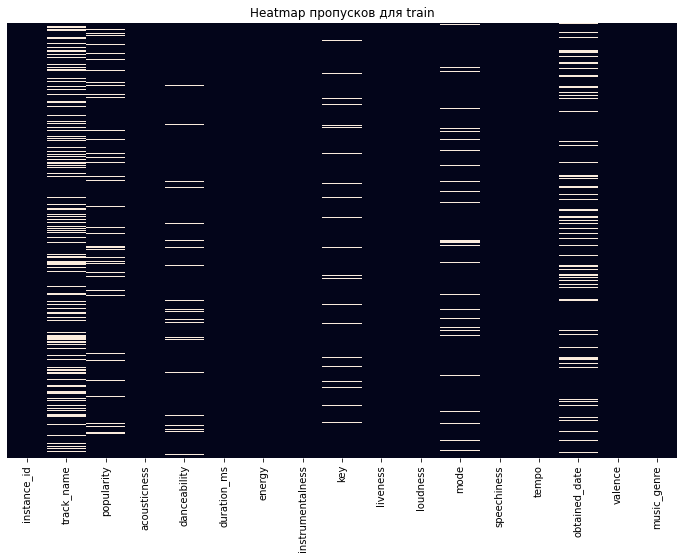

Пропуски в датафрейме test:
               Total  Percent
track_name      2612    26.12
obtained_date   1581    15.81
popularity      1013    10.13
danceability     523     5.23
mode             482     4.82
key              327     3.27



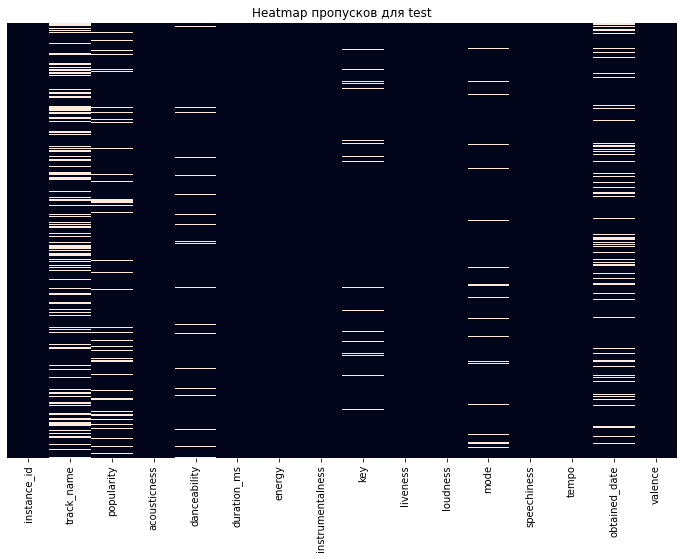

In [321]:
analyze_missing_values(dataframes, ['train', 'test'])

* Несмотря на большое наличие пропусков, данные отсутсвуют лишь в 6 столбцах: `track_name`, `obtained_date`, `popularity`, `danceability`, `mode`, `key`;
* Больше всего пропусков в столбцах `track_name` и `obtained_date` от 15% до 26% от общего кол-ва строк;
* У меня есть предположение, что пропуски могут быть связаны. Думаю, что треки имеющие пропуск в одной переменной, скорее всего имеют другие параметры не заполнеными;
* Построим матрицу корреляции пропусков.

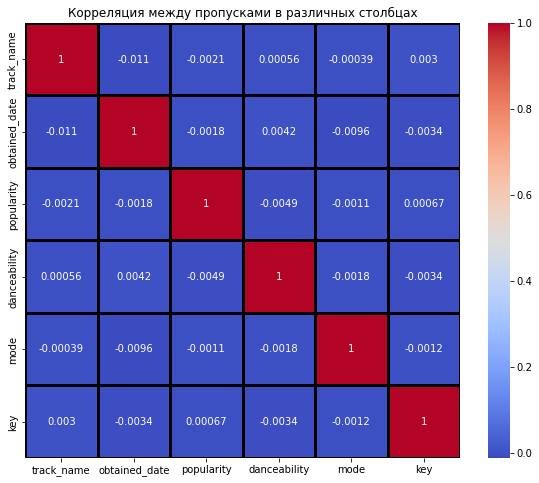

In [322]:
# Создание булевой матрицы пропусков
missing_bool = train[['track_name', 'obtained_date', 'popularity', 'danceability', 'mode', 'key']].isnull()

# Вычисление корреляции между столбцами булевой матрицы
corr = missing_bool.corr(method='spearman')  # Или использовать другой метод корреляции

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', square=True)
plt.title('Корреляция между пропусками в различных столбцах')
plt.show()

* Корреляции между пропусками, к сожалению или к счастью, не наблюдается.
* Поэтапно обработаем пропуски.

In [323]:
import scipy
import scipy.stats.stats
from scipy.stats import poisson

In [324]:
# import scipy.stats
# import phik

# Расчет матрицы корреляции phik
# phik_matrix = train.phik_matrix()

# Построение тепловой карты
# plt.figure(figsize=(12, 8))
# sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='Blues')
# plt.title('Тепловая карта корреляции методом phik')
# plt.show()

#### Пропуски в `popularity`, `danceability`, `mode`, `key`

Столбец `popularity` имеет **9.80%** пропусков от общего числа данных. Это достаточно много, поэтому перед удалением, проверим, можно ли заполнить пропуски.

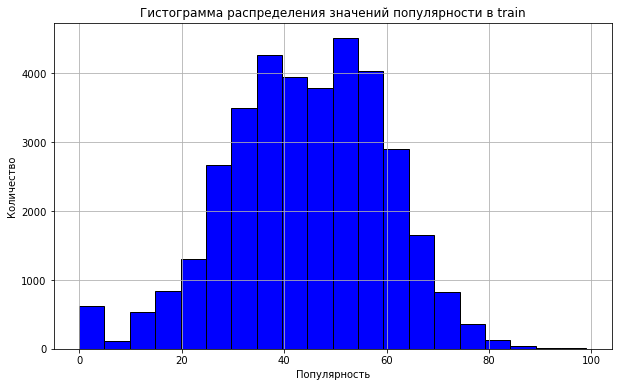

In [325]:
plt.figure(figsize=(10, 6))
plt.hist(train['popularity'], bins=20, color='blue', edgecolor='black')
plt.title('Гистограмма распределения значений популярности в train')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

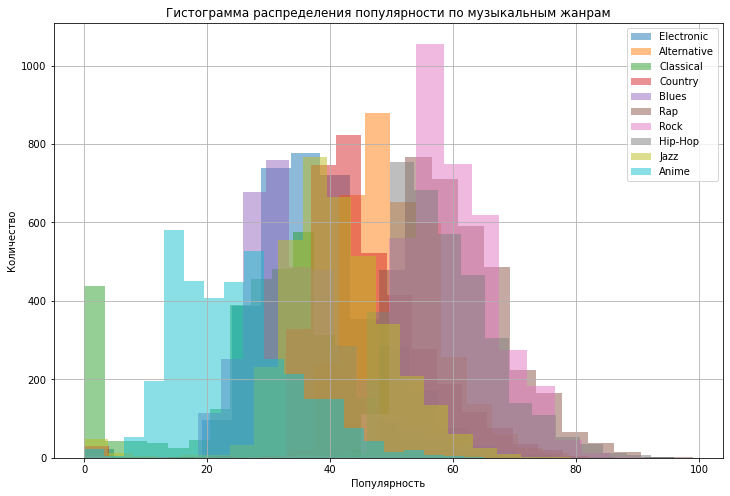

In [326]:
# Уникальные жанры
genres = train['music_genre'].unique()

# Гистограмма для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Наблюдается зависимость популярности от жанра музыки. Центр распределения каждой гистограммы смещен вправо или влево по шкале популярности. Таким образом, пропуски в столбце `popularity` можно заполнить на основе среднего значения популярности для каждого жанра.

In [327]:
# Используем функцию заполнения пропусков медианой
fill_na_with_genre_median(train, 'popularity')
# Проверка, что пропуски были заполнены
print(f'Пропусков в столбце popularity: {train["popularity"].isnull().sum()}')

Пропусков в столбце popularity: 0


Посмотрим на распределение популярности жанров после заполнения пропусков.

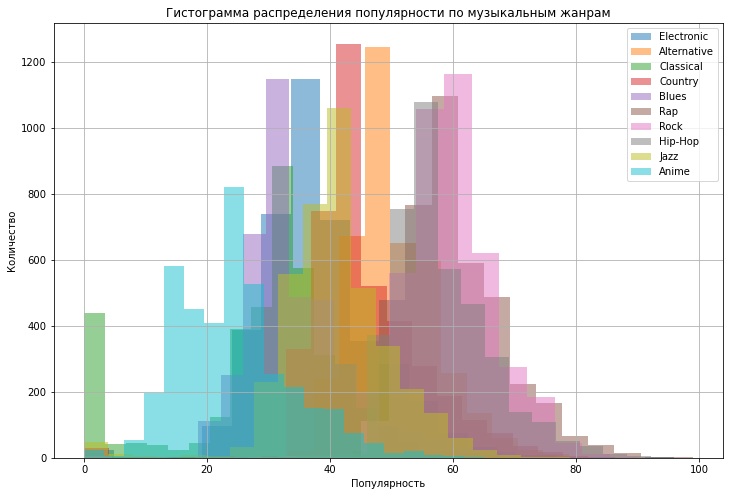

In [328]:
genres = train['music_genre'].unique()    
# Создание гистограмм для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Очевидно, что выросли пики связанные с медианным значением каждого жанра. В принципе, можно считать заполнение пропусков удачным в данном случае.


Проверим столбец `danceability`, там тоже моного пропусков.

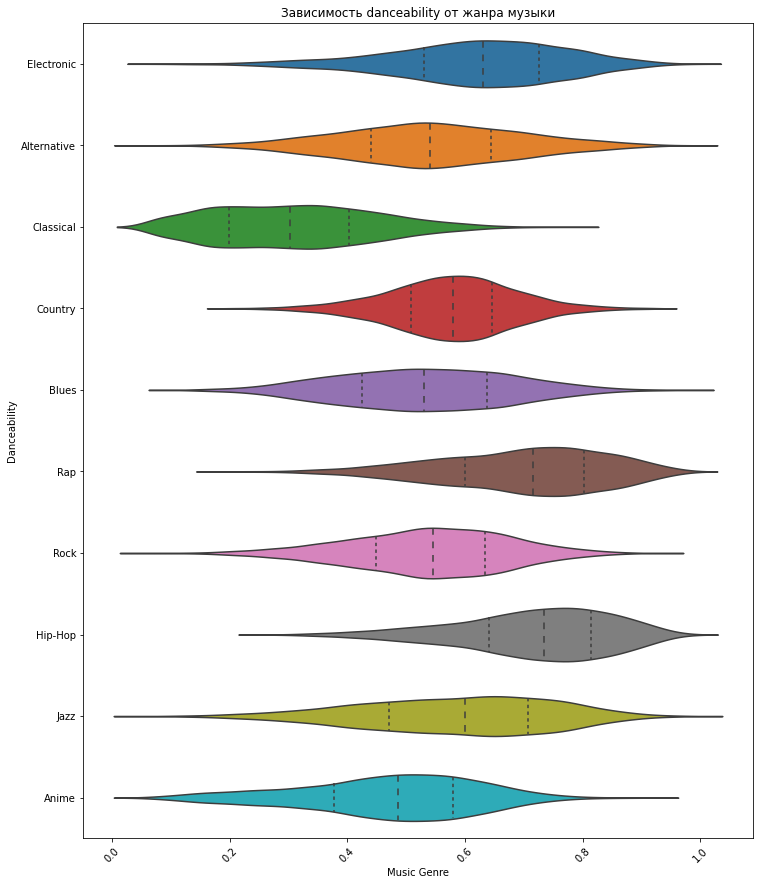

In [329]:
plt.figure(figsize=(12, 15))
sns.violinplot(x='danceability', y='music_genre', data=train,split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Зависимость danceability от жанра музыки')
plt.xlabel('Music Genre')
plt.ylabel('Danceability')
plt.show()

Так как `danceability` - непрерывная велечина, предлагаю пропуски заменять на случайное число лежащее в пределах 50% распределения значений `danceability` для каждого жанра.\
Границы Q1 (25%) и Q3 (75%)

In [330]:
# Вычисление 25-го и 75-го квартилей для 'danceability' по каждому жанру
quantile_table = train.groupby('music_genre')['danceability'].quantile([0.25, 0.75]).unstack()

# Переименование колонок
quantile_table.columns = ['percentile_25', 'percentile_75']

# Сброс индекса, чтобы 'music_genre' стал колонкой
quantile_table.reset_index(inplace=True)

# Выводим результат
display(quantile_table)

,music_genre,percentile_25,percentile_75
0,Alternative,0.44,0.65
1,Anime,0.38,0.58
2,Blues,0.42,0.64
3,Classical,0.20,0.40
4,Country,0.51,0.65
5,Electronic,0.53,0.73
6,Hip-Hop,0.64,0.81
7,Jazz,0.47,0.71
8,Rap,0.60,0.80
9,Rock,0.45,0.63


In [331]:
print(f'Пропусков в столбце danceability: {train["danceability"].isnull().sum()}')

Пропусков в столбце danceability: 2037


In [332]:
fill_na_with_quantile(train, 'danceability')

print(f'Пропусков в столбце danceability: {train["danceability"].isnull().sum()}')

Пропусков в столбце danceability: 0


Столбец `key` 

In [333]:
# Находим три самых частых значения key для каждого жанра
top_keys_per_genre = train.groupby('music_genre')['key'].apply(lambda x: x.value_counts().head(3).index.tolist())

# Функция для заполнения пропущенных значений key
def fill_missing_keys(row):
    if pd.isna(row['key']):
        return np.random.choice(top_keys_per_genre[row['music_genre']])
    else:
        return row['key']

# Применяем функцию к каждой строке
train['key'] = train.apply(fill_missing_keys, axis=1)

Пропущенных данных в этих столбцах мало, менее 5%. Можно смело очистить строки с пропусками.

In [334]:
# Удаление строк
train = train.dropna(subset=['mode', 'key'])

# Размер после удаления
final_size = train.shape[0]

# Расчет и вывод потерь в процентах
loss_percent = ((initial_size - final_size) / initial_size) * 100

print(f"Размер до: {initial_size}")
print(f"Размер после: {final_size}")
print(f"Потеряно данных: {loss_percent:.2f}%")

Размер до: 40000
Размер после: 38147
Потеряно данных: 4.63%


#### Пропуски в `track_name` и `obtained_date`

In [335]:
print(f'Кол-во уникальных названий треков в таблице train {len(train.track_name.unique())}')
print(f'Кол-во уникальных названий треков в таблице test {len(test.track_name.unique())}')

Кол-во уникальных названий треков в таблице train 24950
Кол-во уникальных названий треков в таблице test 7124


In [336]:
print(f'Уникальные даты загрузки треков в таблице train {train.obtained_date.unique()}')
print(f'Уникальные даты загрузки треков в таблице test {test.obtained_date.unique()}')

Уникальные даты загрузки треков в таблице train ['4-Apr' nan '5-Apr' '3-Apr' '1-Apr' '0/4']
Уникальные даты загрузки треков в таблице test ['4-Apr' '3-Apr' nan '5-Apr' '1-Apr']


* Оставим пропуски в этих переменных, тк они не пригодятся нам для анализа.
  * `track_name` уникальна, у нее отсутсвует обобщаемость (как и у `instance_id`), которая могла бы помочь в предсказании жанра;
  * `obtainde_date` может не иметь прямого влияния на жанр трека. Так, у нас присутсвуют данные только за арпель, поэтому если в новых данных будут другие даты, модель не сможет правильно экстраполировать полученный результат.

### Дубликаты

In [337]:
dub_df = train.drop(['instance_id', 'track_name', 'obtained_date'], axis=1)
print('Всего дубликатов строк: ',dub_df.duplicated().sum())

Всего дубликатов строк:  1


Бывает, посмотрим на эту парочку

In [338]:
# Найдем индексы дубликатов
duplicates = dub_df.duplicated(keep=False)
duplicate_indices = dub_df[duplicates].index
display(train.loc[duplicate_indices])

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
13576,2161,Sunspot (B-Sides),23.00,0.28,0.70,"409,400.00",0.39,0.88,C,0.11,-13.73,Major,0.04,87.694,4-Apr,0.59,Electronic
32962,3277,NaN,23.00,0.28,0.70,"409,400.00",0.39,0.88,C,0.11,-13.73,Major,0.04,87.694,4-Apr,0.59,Electronic


Оставим как есть, пусть живет!

In [339]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38147 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       38147 non-null  int64  
 1   track_name        27905 non-null  object 
 2   popularity        38147 non-null  float64
 3   acousticness      38147 non-null  float64
 4   danceability      38147 non-null  float64
 5   duration_ms       38147 non-null  float64
 6   energy            38147 non-null  float64
 7   instrumentalness  38147 non-null  float64
 8   key               38147 non-null  object 
 9   liveness          38147 non-null  float64
 10  loudness          38147 non-null  float64
 11  mode              38147 non-null  object 
 12  speechiness       38147 non-null  float64
 13  tempo             38147 non-null  object 
 14  obtained_date     32187 non-null  object 
 15  valence           38147 non-null  float64
 16  music_genre       38147 non-null  object

### Вывод по итогам предобработки

* Избавились от всех пропусков потеряли всего 4.63%;
* В `popularity` заполнили пропуски медианным значением;
* В `danceability` заполнили пропуски случайным значением лежащим в пределах 50% выборки для каждого жанра.
* Пропуски в `mode` и `key` были удалены из-за их малого кол-ва.

## 3. Исследовательский анализ <a class="anchor" id="chapter3"></a>

### Столбец `popularity`

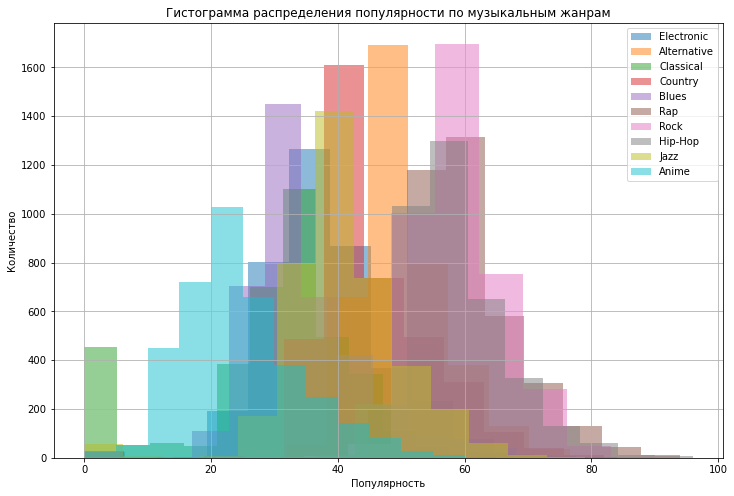

'Описательная статистика для popularity:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",50.26,7.21,0.00,46.00,49.00,54.00,83.00
Anime,"3,825.00",24.09,9.19,0.00,17.00,23.00,29.00,65.00
Blues,"3,799.00",34.65,9.18,0.00,29.00,33.00,38.00,74.00
Classical,"3,833.00",29.61,13.43,0.00,26.00,32.00,37.00,68.00
Country,"3,833.00",45.78,9.20,0.00,40.00,44.00,51.00,82.00
Electronic,"3,853.00",38.01,9.27,0.00,32.00,37.00,43.00,84.00
Hip-Hop,"3,762.00",58.22,7.93,19.00,52.00,57.00,62.75,96.00
Jazz,"3,842.00",40.78,9.11,0.00,36.00,40.00,45.00,79.00
Rap,"3,780.00",60.45,7.83,14.00,55.00,59.00,65.00,94.00


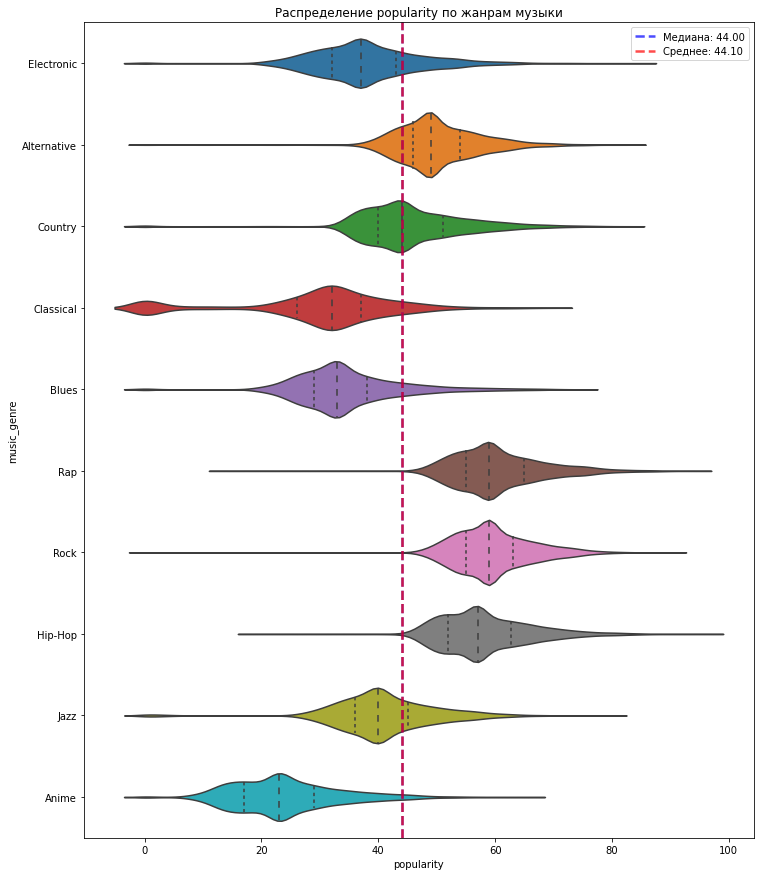

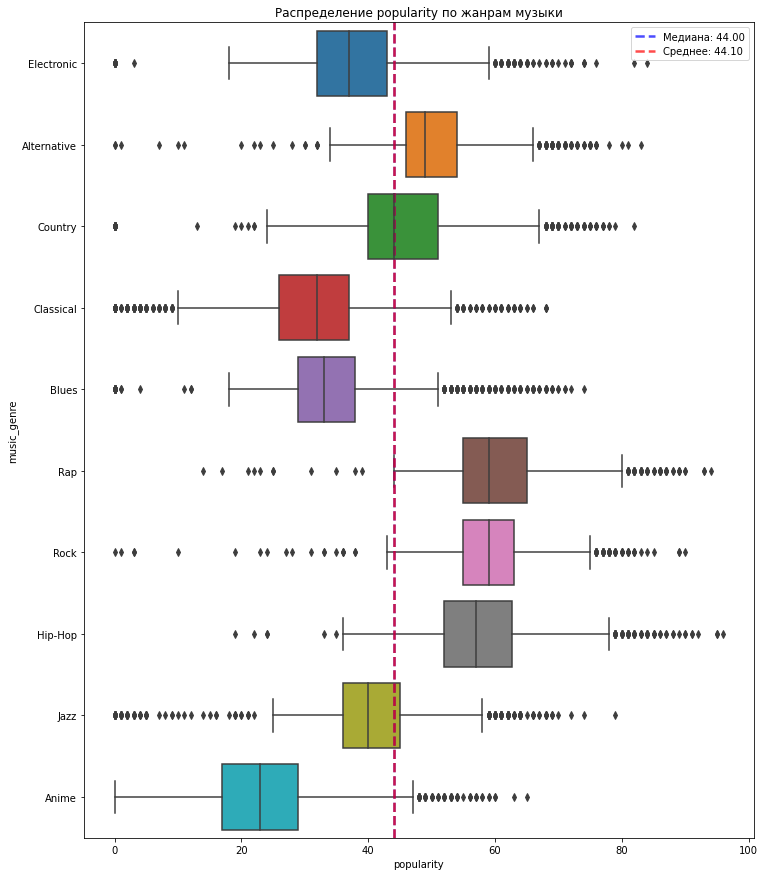

In [340]:
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=13, label=genre, alpha=0.5)
plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()
descriptive_stats_and_plot(train, 'popularity')

* Видна зависимость популярности трека от его жанра;
* Нет критичных выбросов или ошибочных, пропущенных значений;
* Изменим тип столбца на *Int*.

In [341]:
train['popularity'] = train['popularity'].astype(int)

In [342]:
# проверим тип столбца
print(train['popularity'].dtypes)

int32


### Столбец `acousticness`

'Описательная статистика для acousticness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.16,0.24,0.00,0.00,0.03,0.24,0.98
Anime,"3,825.00",0.29,0.37,0.00,0.01,0.07,0.61,1.00
Blues,"3,799.00",0.32,0.31,0.00,0.04,0.21,0.56,0.99
Classical,"3,833.00",0.87,0.26,0.00,0.91,0.97,0.99,1.00
Country,"3,833.00",0.27,0.26,0.00,0.05,0.17,0.43,0.98
Electronic,"3,853.00",0.12,0.20,0.00,0.00,0.03,0.14,0.98
Hip-Hop,"3,762.00",0.18,0.19,0.00,0.03,0.11,0.27,0.98
Jazz,"3,842.00",0.49,0.34,0.00,0.15,0.51,0.82,1.00
Rap,"3,780.00",0.17,0.19,0.00,0.02,0.09,0.25,0.94


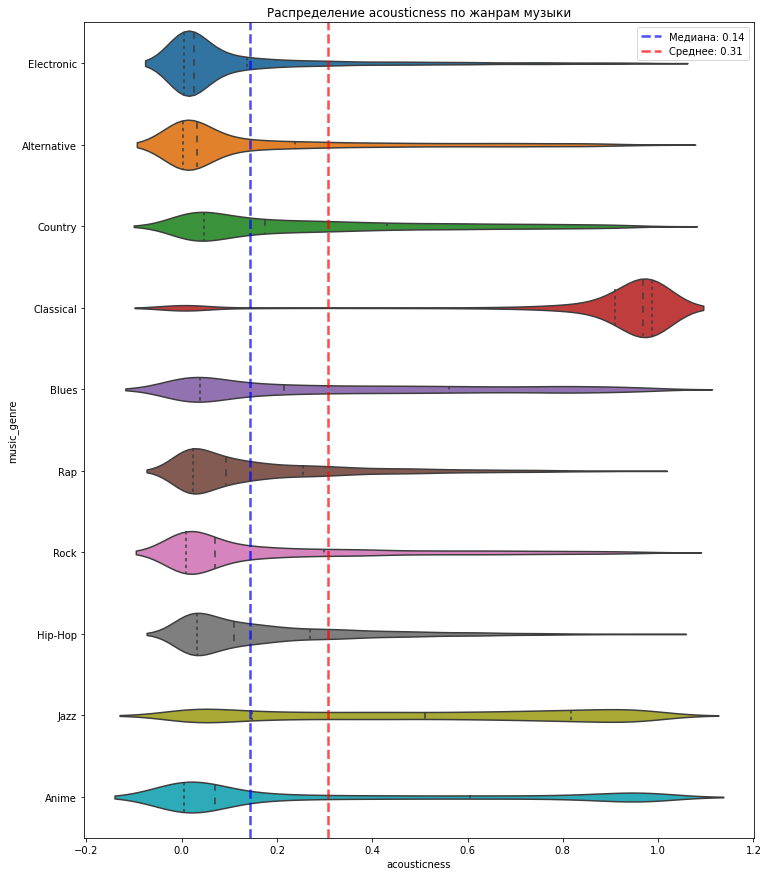

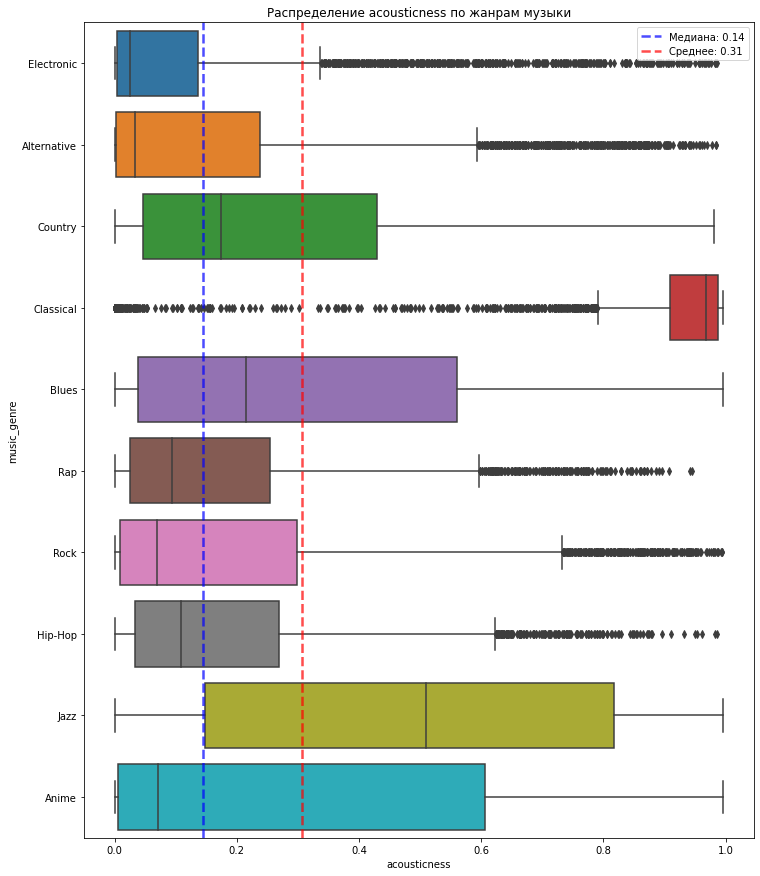

In [343]:
descriptive_stats_and_plot(train, 'acousticness')

* В целом, выделяется только значения в жанре **Classical**, они смещают медиану со средним и немного "ломают восприятие";
* Построим график без этого жанра.

'Описательная статистика для acousticness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.16,0.24,0.00,0.00,0.03,0.24,0.98
Anime,"3,825.00",0.29,0.37,0.00,0.01,0.07,0.61,1.00
Blues,"3,799.00",0.32,0.31,0.00,0.04,0.21,0.56,0.99
Country,"3,833.00",0.27,0.26,0.00,0.05,0.17,0.43,0.98
Electronic,"3,853.00",0.12,0.20,0.00,0.00,0.03,0.14,0.98
Hip-Hop,"3,762.00",0.18,0.19,0.00,0.03,0.11,0.27,0.98
Jazz,"3,842.00",0.49,0.34,0.00,0.15,0.51,0.82,1.00
Rap,"3,780.00",0.17,0.19,0.00,0.02,0.09,0.25,0.94
Rock,"3,861.00",0.19,0.25,0.00,0.01,0.07,0.30,0.99


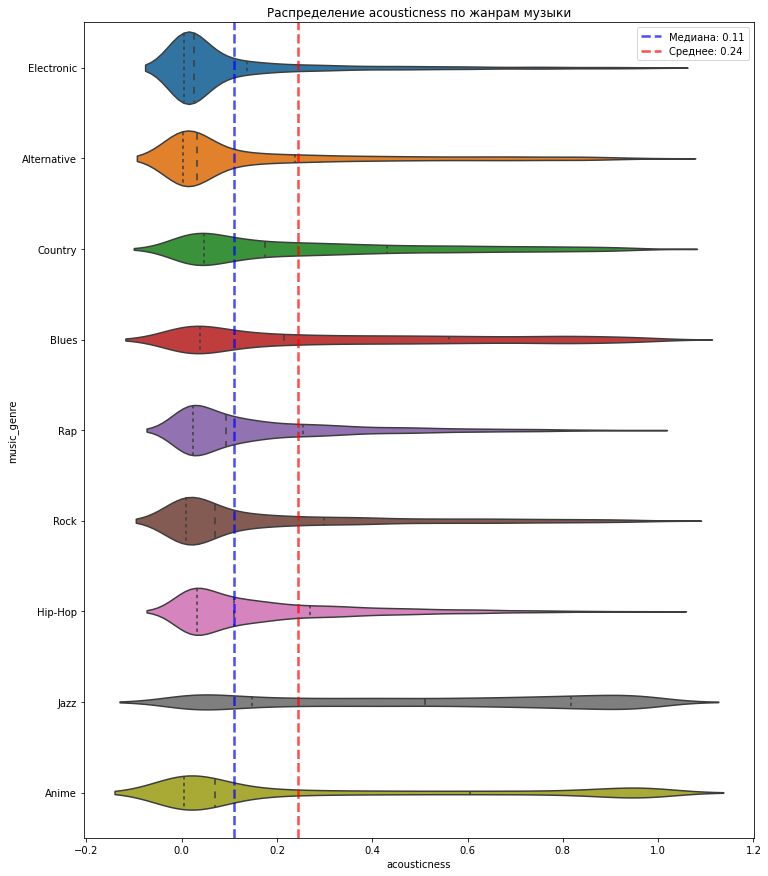

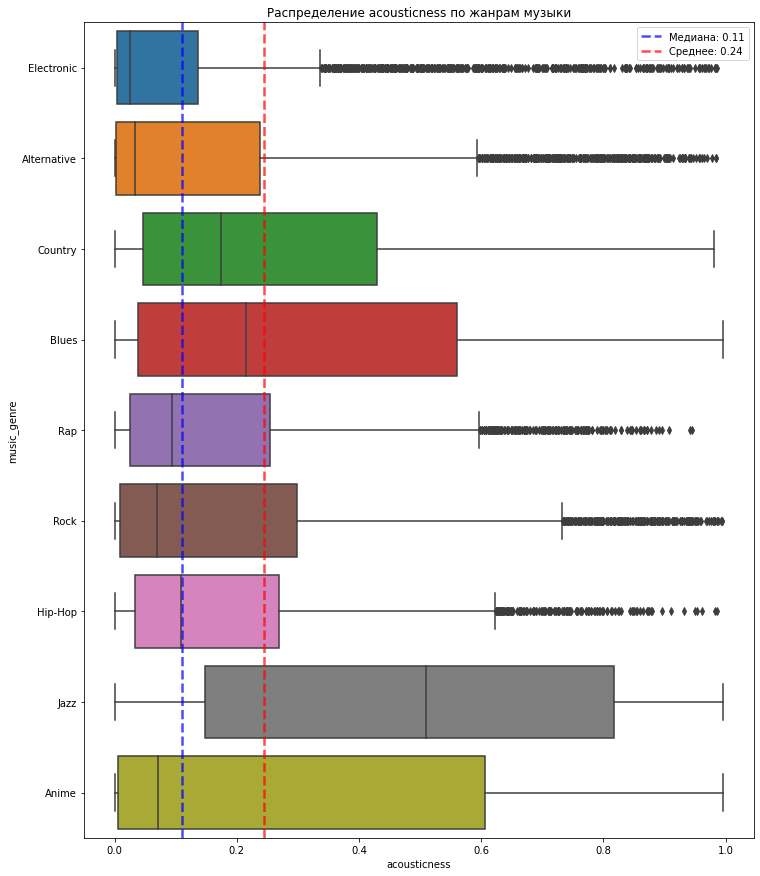

In [344]:
descriptive_stats_and_plot((train[train['music_genre'] != 'Classical']), 'acousticness')

* Числовые метрики сместились влево.
* Критических выбросов или ошибочных значений не обнаружено.

### Столбец `danceability` 

'Описательная статистика для danceability:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.54,0.15,0.13,0.44,0.54,0.64,0.97
Anime,"3,825.00",0.47,0.15,0.06,0.39,0.49,0.57,0.91
Blues,"3,799.00",0.53,0.14,0.12,0.43,0.53,0.63,0.97
Classical,"3,833.00",0.31,0.13,0.06,0.20,0.30,0.40,0.78
Country,"3,833.00",0.58,0.11,0.20,0.51,0.58,0.64,0.92
Electronic,"3,853.00",0.62,0.14,0.08,0.54,0.63,0.72,0.98
Hip-Hop,"3,762.00",0.72,0.13,0.27,0.65,0.73,0.81,0.98
Jazz,"3,842.00",0.58,0.16,0.06,0.48,0.60,0.70,0.97
Rap,"3,780.00",0.70,0.14,0.20,0.61,0.71,0.80,0.97


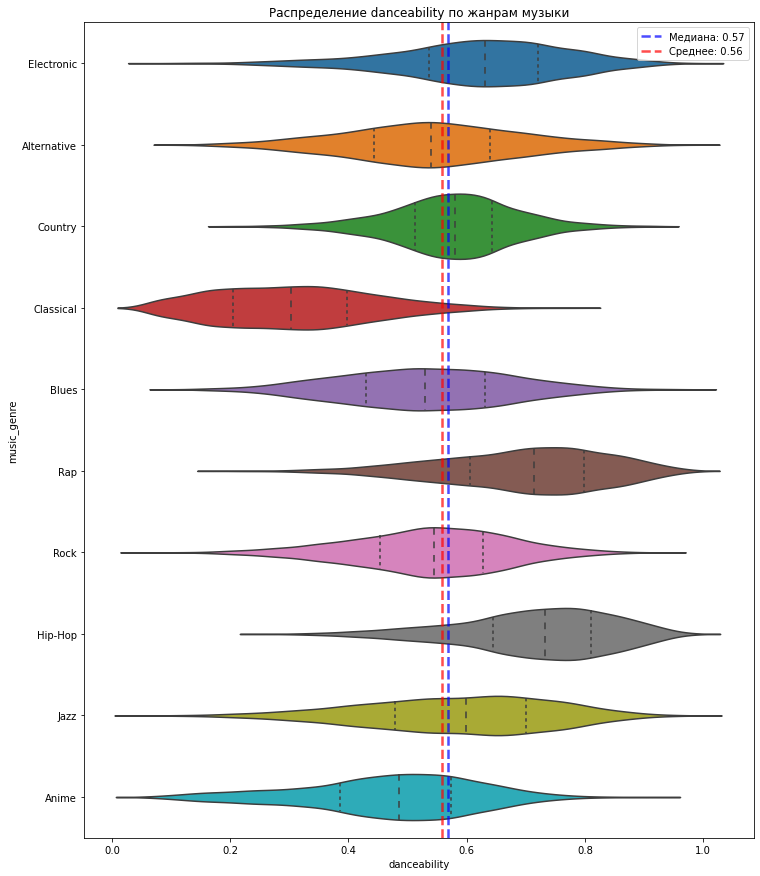

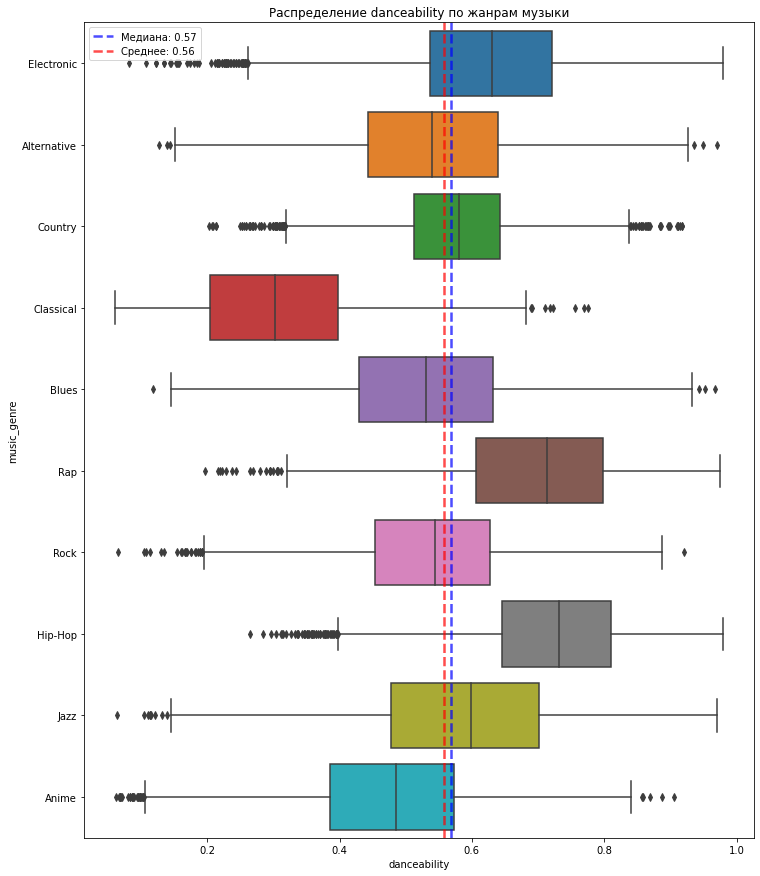

In [345]:
descriptive_stats_and_plot(train, 'danceability')

'Описательная статистика для danceability:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.54,0.15,0.13,0.44,0.54,0.64,0.97
Anime,"3,825.00",0.47,0.15,0.06,0.39,0.49,0.57,0.91
Blues,"3,799.00",0.53,0.14,0.12,0.43,0.53,0.63,0.97
Country,"3,833.00",0.58,0.11,0.20,0.51,0.58,0.64,0.92
Electronic,"3,853.00",0.62,0.14,0.08,0.54,0.63,0.72,0.98
Hip-Hop,"3,762.00",0.72,0.13,0.27,0.65,0.73,0.81,0.98
Jazz,"3,842.00",0.58,0.16,0.06,0.48,0.60,0.70,0.97
Rap,"3,780.00",0.70,0.14,0.20,0.61,0.71,0.80,0.97
Rock,"3,861.00",0.54,0.13,0.06,0.45,0.55,0.63,0.92


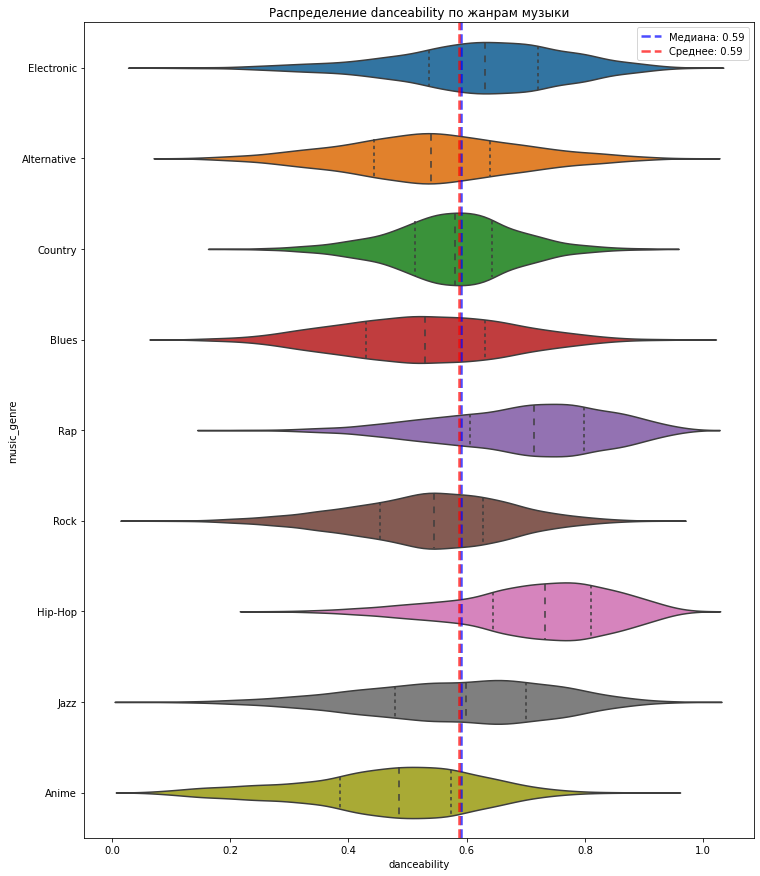

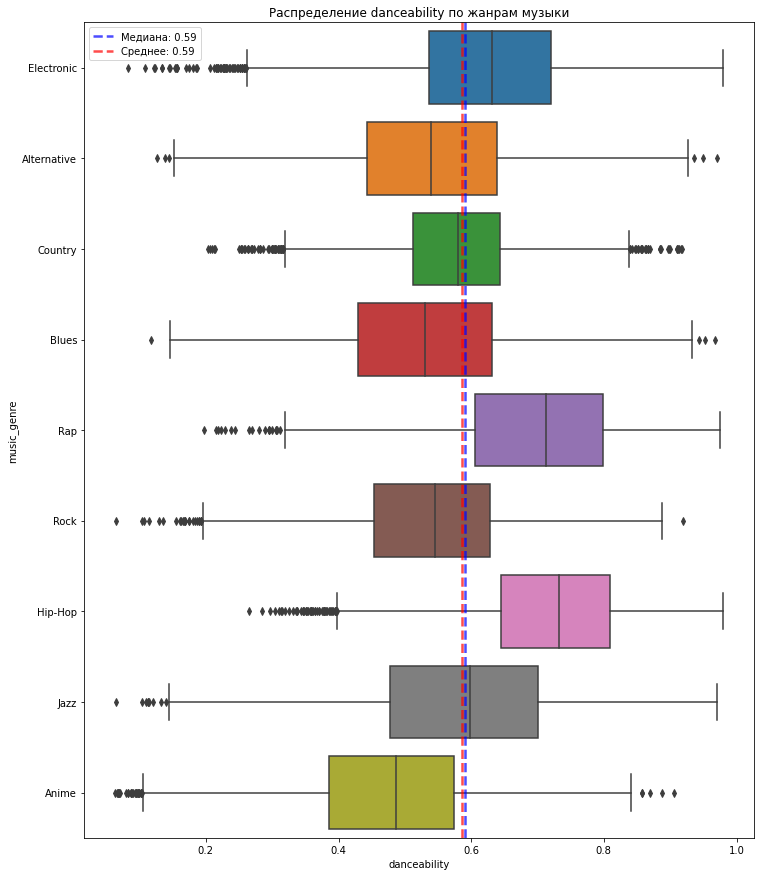

In [346]:
descriptive_stats_and_plot((train[train['music_genre'] != 'Classical']), 'danceability')

* Аномалии не выявлены, оставим столбец как есть.

### Столбец duration_ms (#section3_2)

'Описательная статистика для duration_ms:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00","209,927.20","90,963.29",-1.00,"186,184.00","219,717.00","255,283.50","656,493.00"
Anime,"3,825.00","209,616.09","106,625.40",-1.00,"145,707.00","230,240.00","273,821.00","1,295,600.00"
Blues,"3,799.00","228,238.44","134,134.75",-1.00,"171,532.00","220,187.00","279,153.50","2,019,293.00"
Classical,"3,833.00","278,690.17","222,161.74",-1.00,"148,493.00","241,333.00","365,840.00","3,195,440.00"
Country,"3,833.00","197,164.41","76,351.51",-1.00,"180,736.00","208,067.00","234,187.00","599,315.00"
Electronic,"3,853.00","244,672.19","170,639.43",-1.00,"192,553.00","236,800.00","297,931.00","4,830,606.00"
Hip-Hop,"3,762.00","199,400.32","86,633.52",-1.00,"168,312.25","210,050.50","249,040.00","723,573.00"
Jazz,"3,842.00","238,847.37","130,782.92",-1.00,"172,355.25","238,071.50","304,733.00","1,237,960.00"
Rap,"3,780.00","195,360.97","85,870.41",-1.00,"168,157.50","207,044.00","243,929.25","579,293.00"


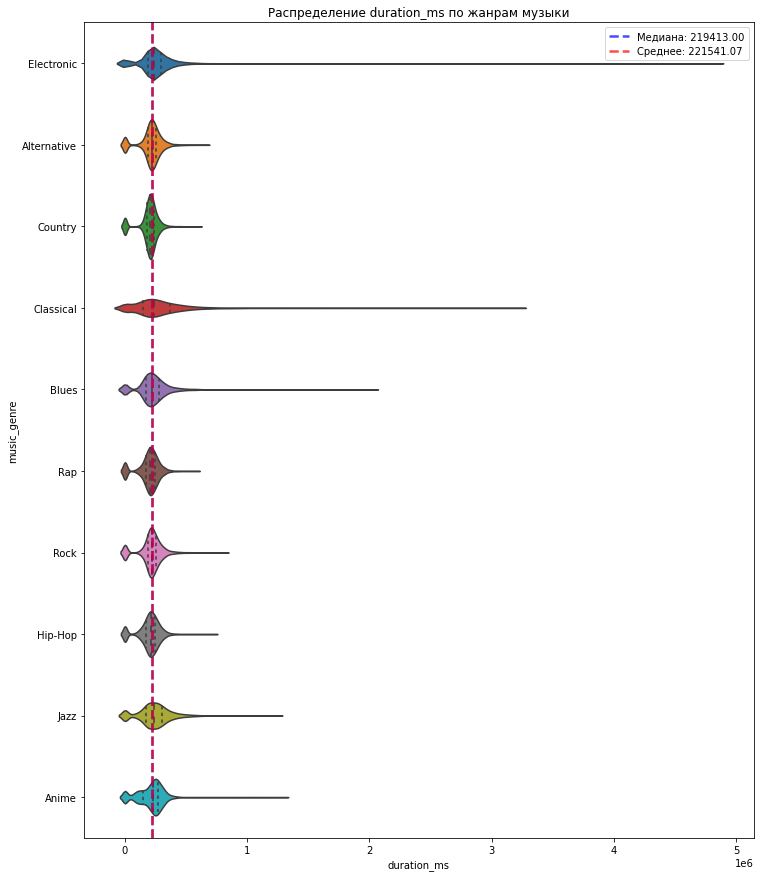

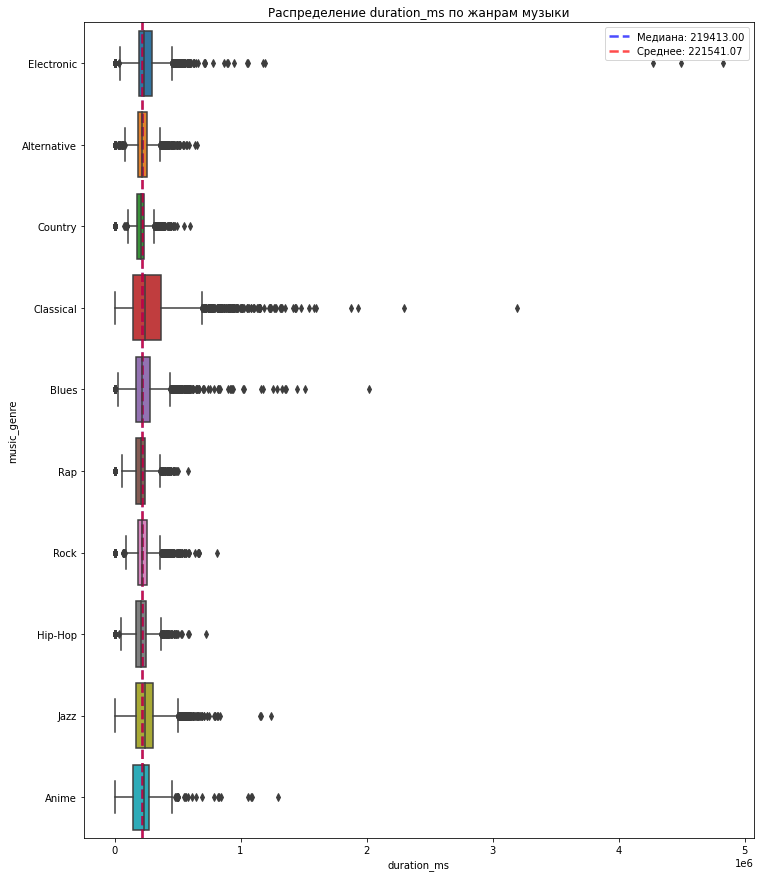

In [347]:
descriptive_stats_and_plot(train, 'duration_ms')

* Столбец содержит целочисленные значения, поменяем тип на int.
* В столбце несколько проблем:
    * Наличие выбросов искажающих общую картину средней длительности трека;
    * Наличие отрицательных значений длительности трека;
    * Неправильный тип столбца.


Отрицательные значения `duration_ms`
* Отрицательные значения в этом столбце - по сути, неявные пропуски. Поскольку, все отрицательные значания равны **-1**, что делает иъ схожими.
* Возможно ошибка вызвана техническим сбоем или человеческим фактором.

In [348]:
train['duration_ms'].replace(-1, np.nan, inplace=True)
print(f'Пропусков в столбце duration_ms: {train["duration_ms"].isnull().sum()}')

Пропусков в столбце duration_ms: 3769


In [349]:
fill_na_with_genre_median(train, 'duration_ms')

print(f'Пропусков в столбце duration_ms: {train["duration_ms"].isnull().sum()}')

Пропусков в столбце duration_ms: 0


Исправим тип переменной

In [350]:
train['duration_ms'] = train['duration_ms'].astype(int)
print(train['duration_ms'].dtypes)

int32


Исправим длительность

'Описательная статистика для duration_ms:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00","232,850.15","57,392.45","24,000.00","201,107.50","225,568.00","255,283.50","656,493.00"
Anime,"3,825.00","231,515.01","81,639.09","30,515.00","191,067.00","238,790.00","273,821.00","1,000,000.00"
Blues,"3,799.00","249,789.68","101,193.24","30,097.00","190,873.50","228,827.00","279,153.50","1,000,000.00"
Classical,"3,833.00","301,888.10","179,399.88","16,316.00","188,000.00","261,746.00","365,840.00","1,000,000.00"
Country,"3,833.00","216,965.18","42,733.68","78,187.00","191,760.00","212,000.00","234,187.00","599,315.00"
Electronic,"3,853.00","265,154.20","94,092.85","34,059.00","210,280.00","245,251.00","297,931.00","1,000,000.00"
Hip-Hop,"3,762.00","220,123.27","57,320.69","33,093.00","187,481.75","215,954.00","249,040.00","723,573.00"
Jazz,"3,842.00","263,278.00","103,232.73","19,693.00","197,523.50","249,780.00","304,733.00","1,000,000.00"
Rap,"3,780.00","218,004.46","53,457.73","59,118.00","187,647.25","213,980.00","243,929.25","579,293.00"


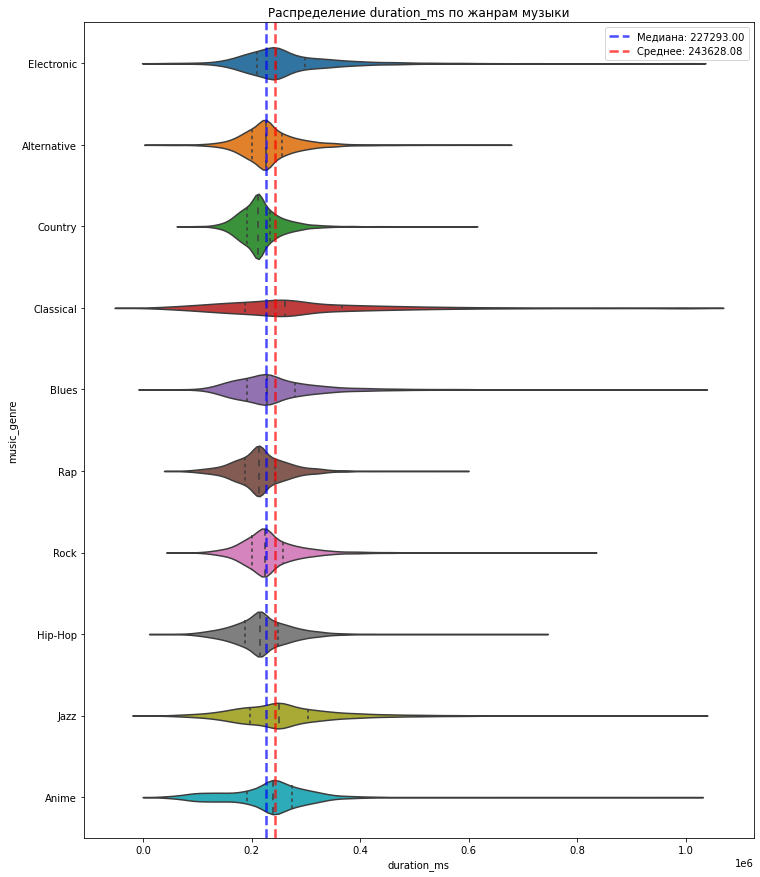

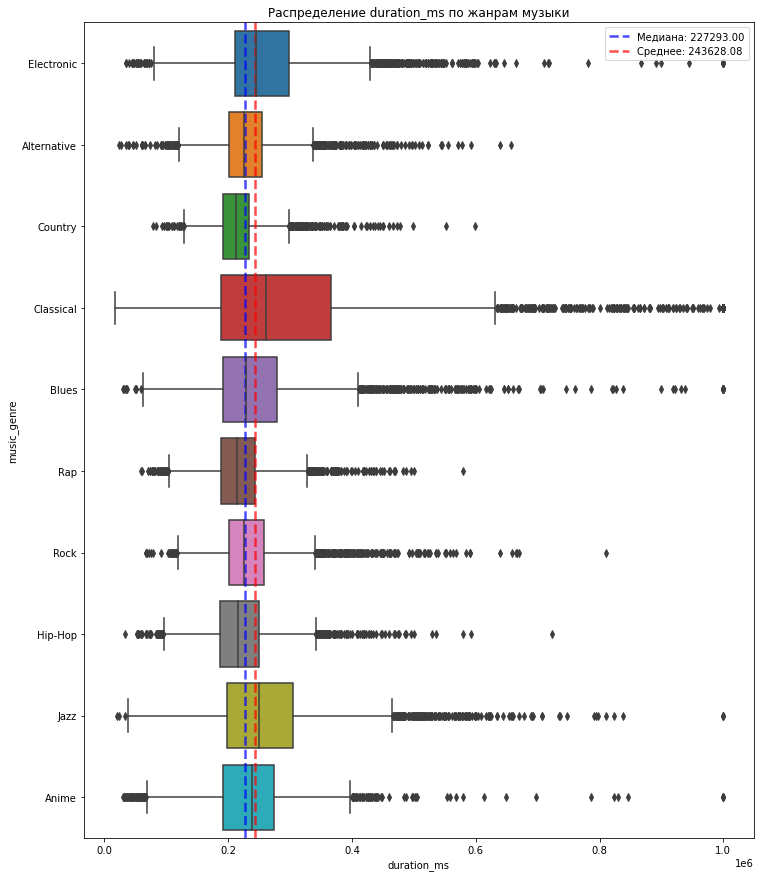

In [351]:
train.loc[train['duration_ms'] > 1000000, 'duration_ms'] = 1000000
descriptive_stats_and_plot(train, 'duration_ms')

### Столбец `energy` (#section3_4)

'Описательная статистика для energy:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.71,0.21,0.05,0.56,0.75,0.89,1.00
Anime,"3,825.00",0.66,0.30,0.00,0.41,0.77,0.93,1.00
Blues,"3,799.00",0.61,0.23,0.01,0.45,0.63,0.80,1.00
Classical,"3,833.00",0.18,0.23,0.00,0.04,0.10,0.20,0.99
Country,"3,833.00",0.64,0.20,0.02,0.50,0.67,0.80,0.98
Electronic,"3,853.00",0.74,0.19,0.02,0.61,0.77,0.90,1.00
Hip-Hop,"3,762.00",0.65,0.15,0.10,0.54,0.65,0.76,0.99
Jazz,"3,842.00",0.48,0.24,0.00,0.29,0.48,0.66,1.00
Rap,"3,780.00",0.65,0.16,0.08,0.54,0.65,0.76,1.00


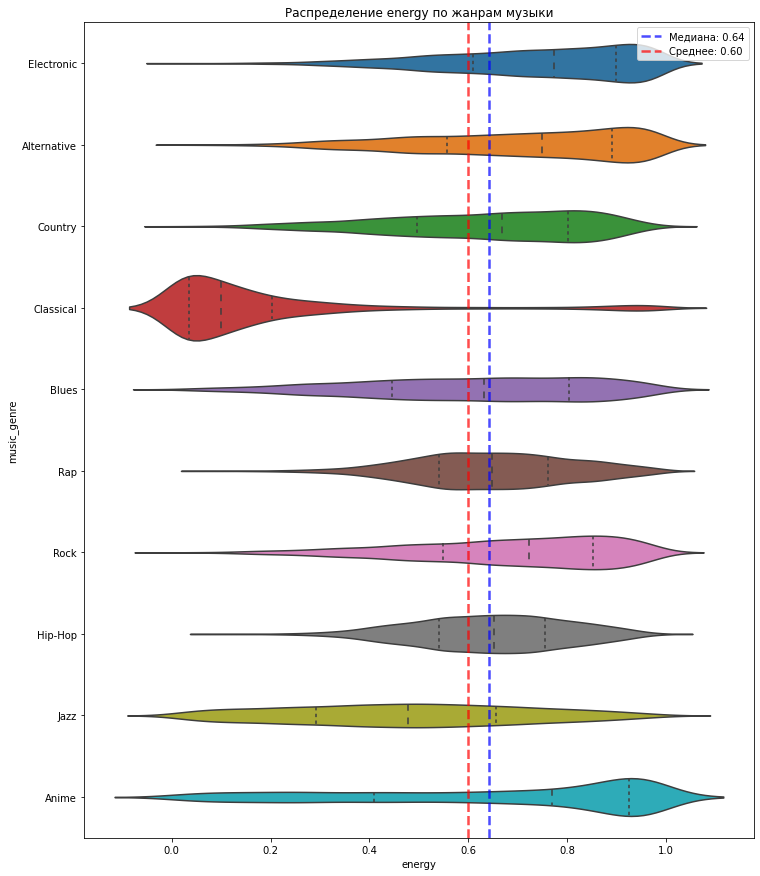

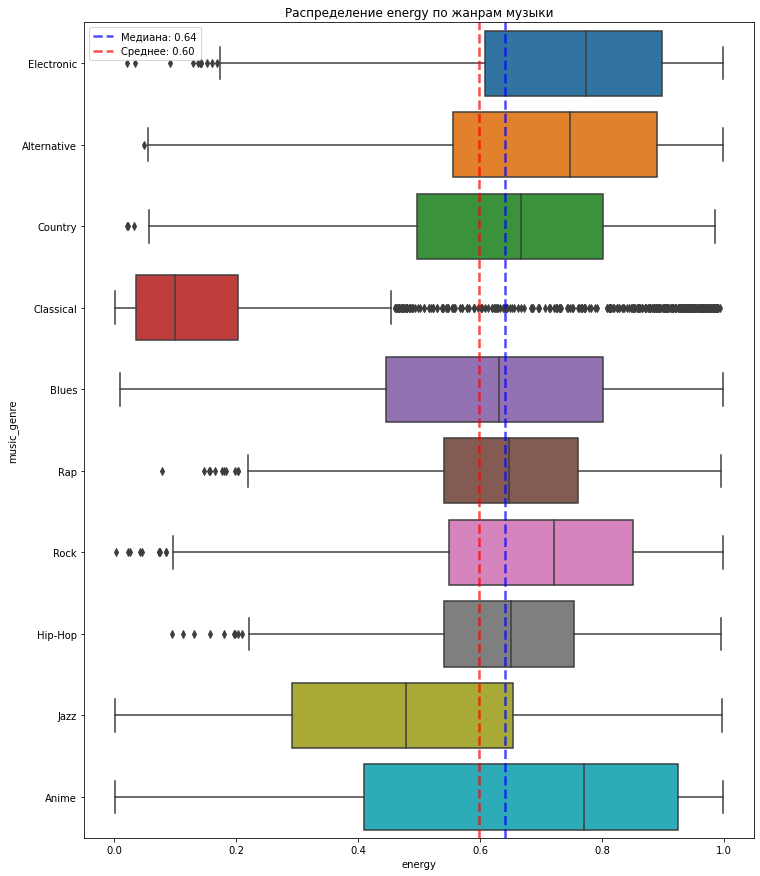

In [352]:
descriptive_stats_and_plot(train, 'energy')

* Аномалий в данных не обнаружено;
* Как всегда выделяется жанр **Classical** центр распределения смещено сильно влево отностельно средних значений;
* Видент тренд зависимости `energy` для каждого жанра музыки.

### Столбец `instrumentalness` (#section3_4)

'Описательная статистика для instrumentalness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.06,0.17,0.00,0.00,0.00,0.01,0.94
Anime,"3,825.00",0.29,0.39,0.00,0.00,0.00,0.78,0.99
Blues,"3,799.00",0.09,0.22,0.00,0.00,0.00,0.04,0.97
Classical,"3,833.00",0.60,0.38,0.00,0.16,0.83,0.91,0.99
Country,"3,833.00",0.01,0.04,0.00,0.00,0.00,0.00,0.78
Electronic,"3,853.00",0.35,0.36,0.00,0.00,0.20,0.76,0.99
Hip-Hop,"3,762.00",0.01,0.07,0.00,0.00,0.00,0.00,0.91
Jazz,"3,842.00",0.35,0.38,0.00,0.00,0.12,0.80,0.98
Rap,"3,780.00",0.01,0.06,0.00,0.00,0.00,0.00,0.92


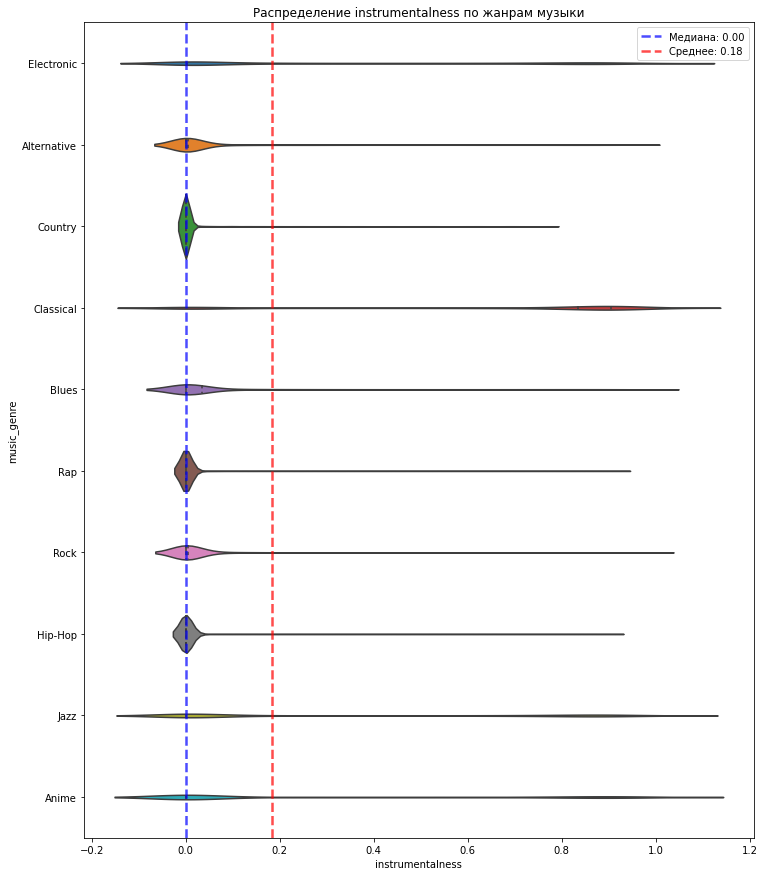

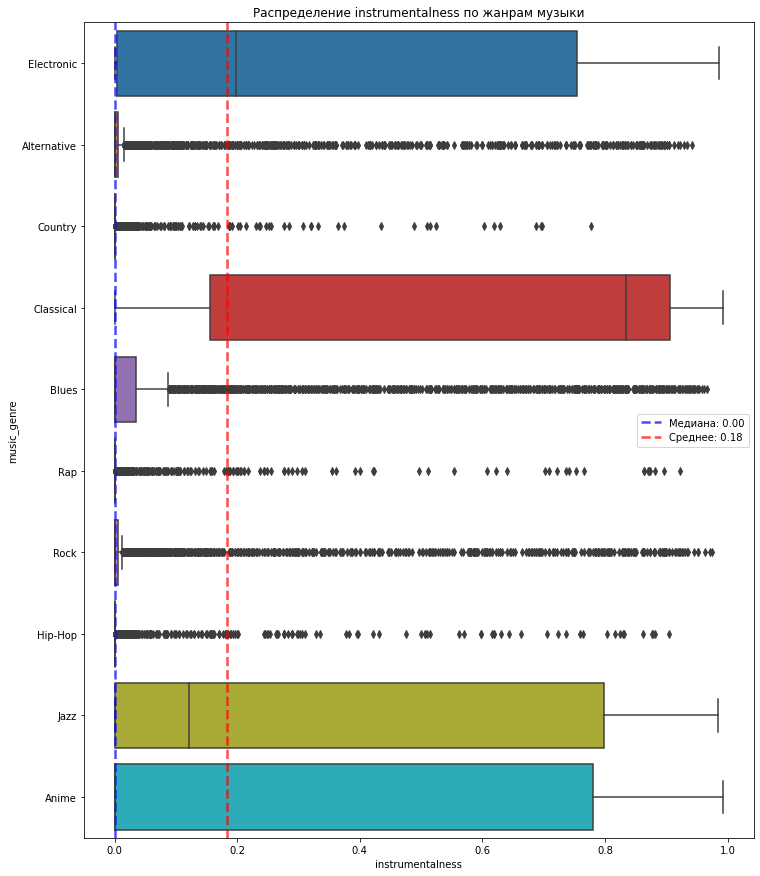

In [353]:
descriptive_stats_and_plot(train, 'instrumentalness')

In [354]:
# Создание нового синтетического признака
# Например, сочетание энергии трека и его громкости, которое может отражать общую "силу" трека
# train['energy_loudness'] = train['energy'] * train['loudness']

# Проверка результата
# train[['energy', 'loudness', 'energy_loudness']].head()

In [355]:
# Избавляемся от лишних строк при помощи процентилей
# upper_lim = train['column'].quantile(.95)
# lower_lim = train['column'].quantile(.05)
# train = train[(train['column'] < upper_lim) & (train['column'] > lower_lim)]

### Столбец key (#section3_5)

### Столбец liveness (#section3_5)

'Описательная статистика для liveness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.20,0.15,0.02,0.10,0.13,0.26,0.99
Anime,"3,825.00",0.19,0.14,0.02,0.10,0.14,0.28,0.96
Blues,"3,799.00",0.23,0.22,0.01,0.10,0.14,0.29,1.00
Classical,"3,833.00",0.16,0.14,0.02,0.09,0.11,0.16,0.99
Country,"3,833.00",0.19,0.15,0.02,0.10,0.13,0.23,0.98
Electronic,"3,853.00",0.21,0.17,0.02,0.10,0.13,0.28,0.98
Hip-Hop,"3,762.00",0.20,0.15,0.02,0.10,0.14,0.27,0.99
Jazz,"3,842.00",0.17,0.15,0.02,0.09,0.11,0.18,0.98
Rap,"3,780.00",0.20,0.15,0.02,0.10,0.14,0.25,0.99


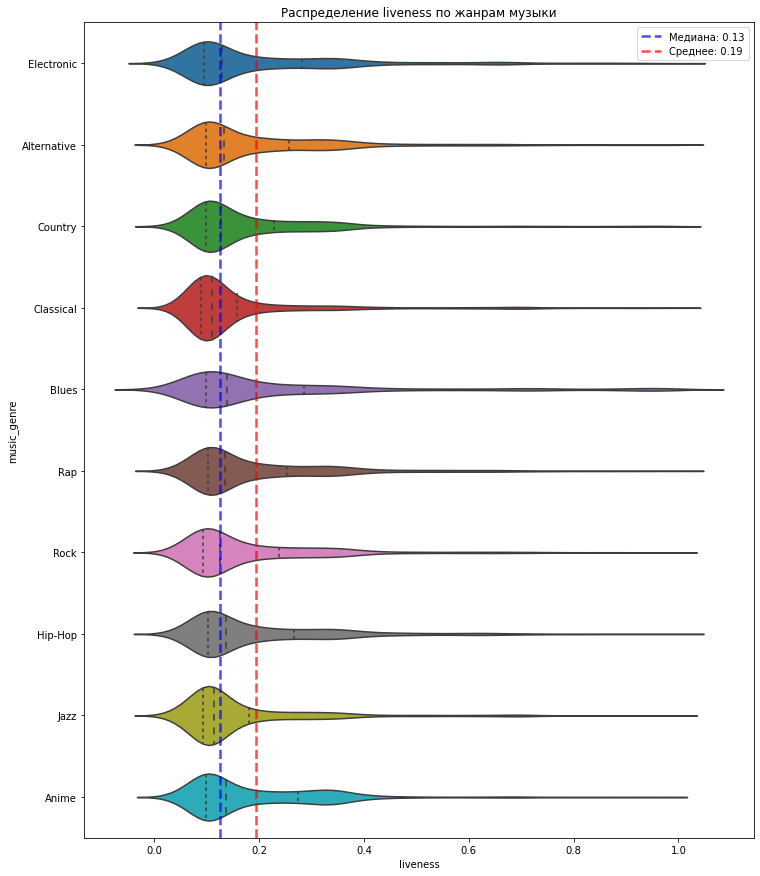

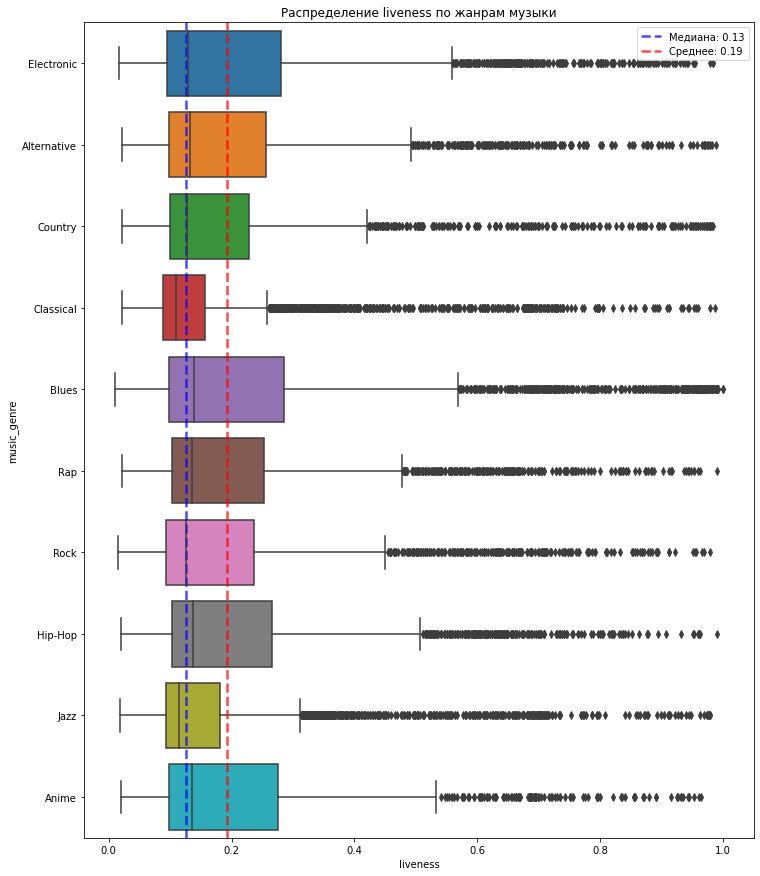

In [356]:
descriptive_stats_and_plot(train, 'liveness')

### Столбец loudness (#section3_6)

'Описательная статистика для loudness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",-9.05,13.33,-85.65,-8.37,-6.12,-4.54,1.34
Anime,"3,825.00",-10.22,13.62,-102.73,-11.59,-5.88,-3.69,1.61
Blues,"3,799.00",-12.02,14.76,-89.55,-11.91,-8.66,-6.23,3.74
Classical,"3,833.00",-24.09,15.14,-110.95,-27.02,-22.32,-17.45,-2.35
Country,"3,833.00",-9.81,13.31,-86.84,-9.28,-6.63,-5.10,-0.52
Electronic,"3,853.00",-9.26,12.82,-88.17,-9.64,-6.59,-4.46,1.58
Hip-Hop,"3,762.00",-9.65,13.95,-85.39,-8.44,-6.63,-5.22,1.01
Jazz,"3,842.00",-13.67,13.78,-96.64,-14.06,-10.53,-7.93,-1.69
Rap,"3,780.00",-9.24,13.32,-84.25,-8.27,-6.48,-5.11,-0.80


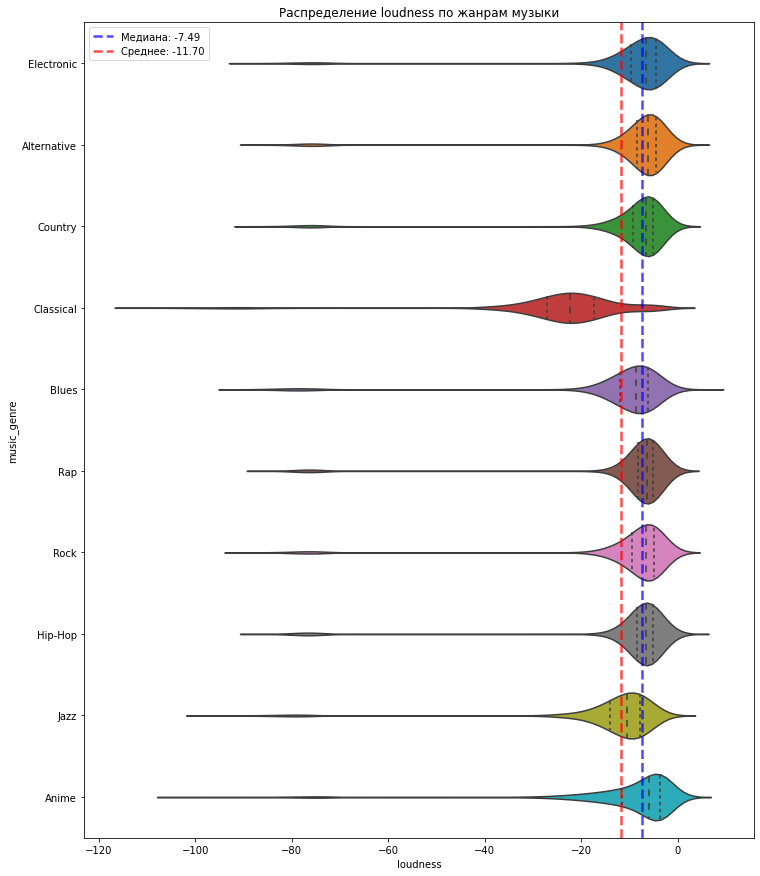

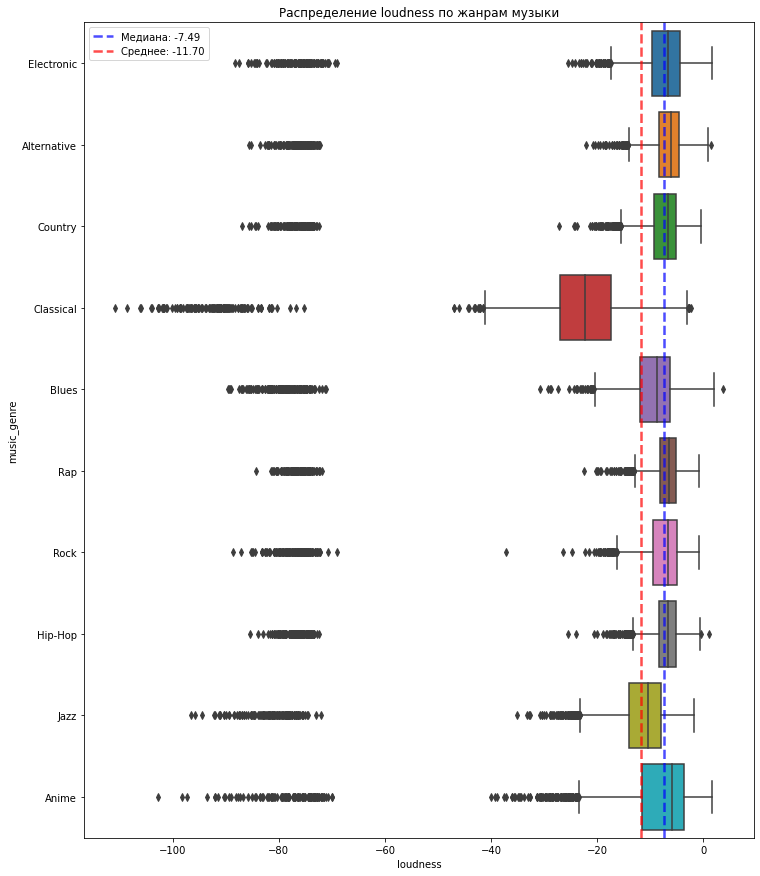

In [357]:
descriptive_stats_and_plot(train, 'loudness')

### Столбец speechiness (#section3_7)


'Описательная статистика для speechiness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.12,0.20,0.02,0.04,0.05,0.10,1.46
Anime,"3,825.00",0.10,0.18,0.02,0.04,0.05,0.07,1.32
Blues,"3,799.00",0.10,0.19,0.02,0.03,0.04,0.07,1.39
Classical,"3,833.00",0.09,0.19,0.02,0.04,0.04,0.05,1.34
Country,"3,833.00",0.08,0.19,0.02,0.03,0.03,0.05,1.42
Electronic,"3,853.00",0.14,0.21,0.02,0.04,0.06,0.13,1.53
Hip-Hop,"3,762.00",0.25,0.24,0.03,0.09,0.20,0.31,1.82
Jazz,"3,842.00",0.11,0.20,0.02,0.04,0.04,0.08,1.46
Rap,"3,780.00",0.22,0.23,0.02,0.07,0.17,0.29,1.79


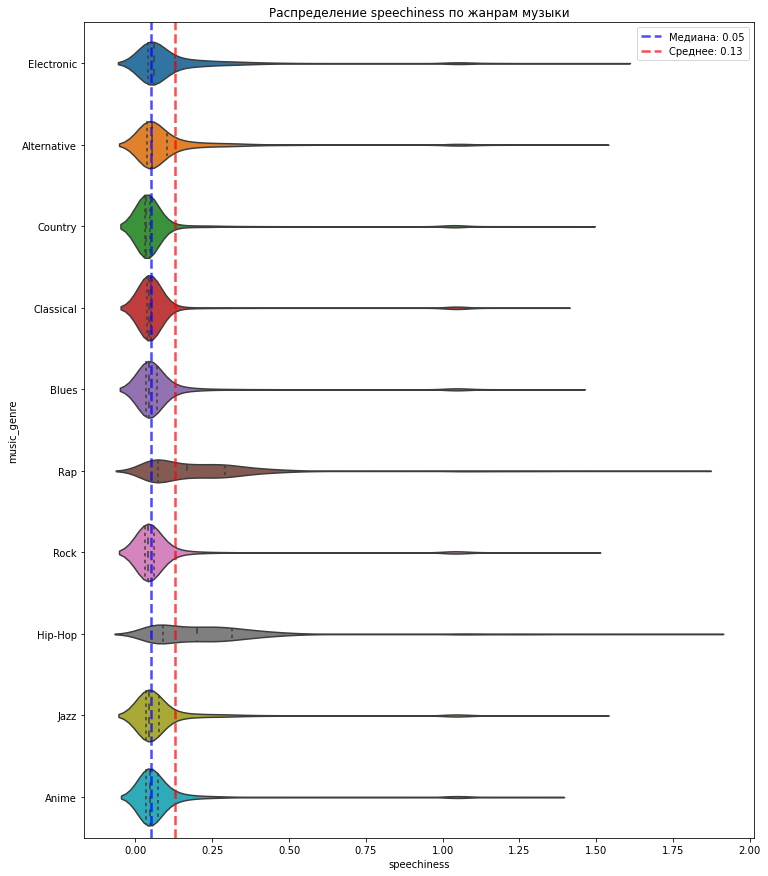

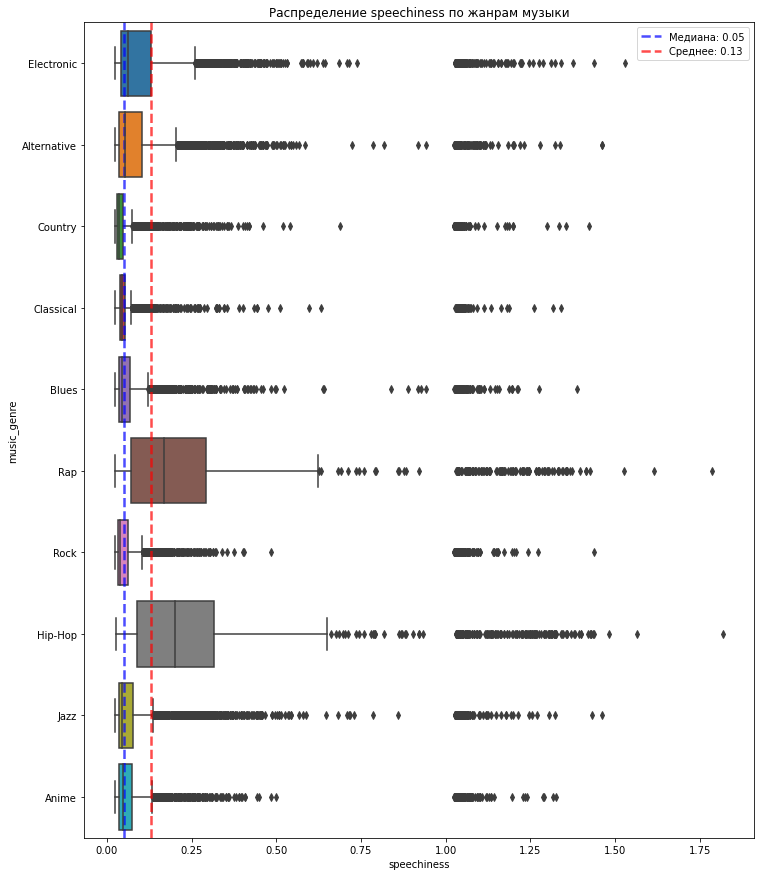

In [358]:
descriptive_stats_and_plot(train, 'speechiness')

### Столбец tempo (#section3_8)

In [363]:
train = replace_question_marks_with_random(train, 'tempo')

train['tempo'].isnull().sum()

0

### Столбец valence](#section3_9)

'Описательная статистика для valence:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.45,0.22,0.03,0.28,0.43,0.60,0.98
Anime,"3,825.00",0.43,0.25,0.00,0.23,0.43,0.62,0.99
Blues,"3,799.00",0.58,0.22,0.04,0.41,0.59,0.76,0.98
Classical,"3,833.00",0.21,0.20,0.00,0.06,0.14,0.31,0.98
Country,"3,833.00",0.54,0.22,0.04,0.36,0.52,0.72,0.98
Electronic,"3,853.00",0.39,0.24,0.03,0.19,0.35,0.56,0.99
Hip-Hop,"3,762.00",0.47,0.22,0.04,0.30,0.47,0.64,0.98
Jazz,"3,842.00",0.51,0.25,0.03,0.30,0.51,0.71,0.98
Rap,"3,780.00",0.45,0.21,0.03,0.29,0.45,0.61,0.97


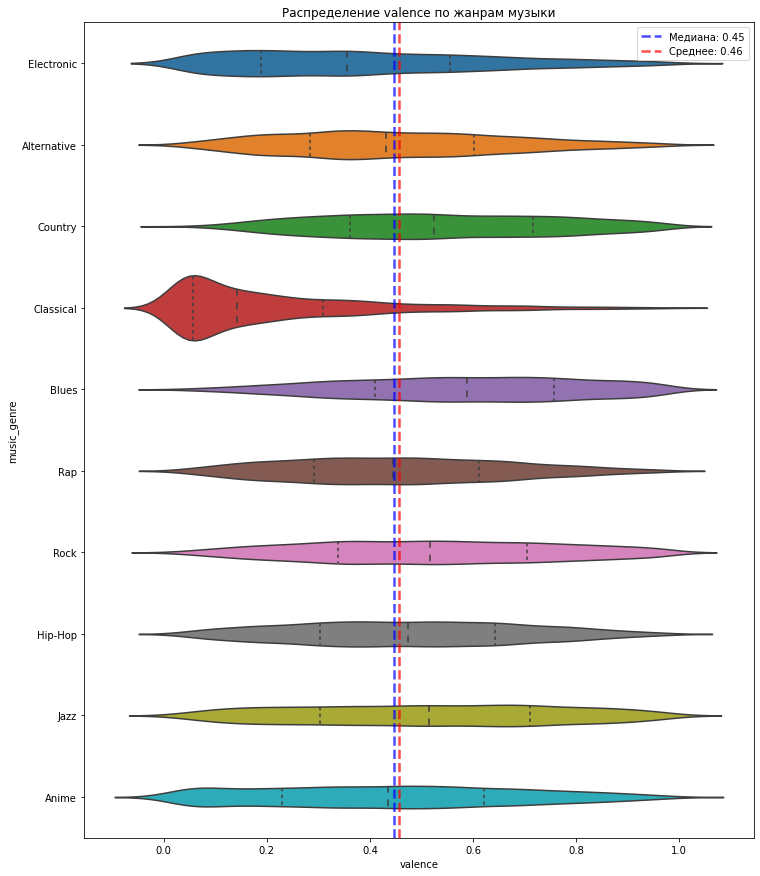

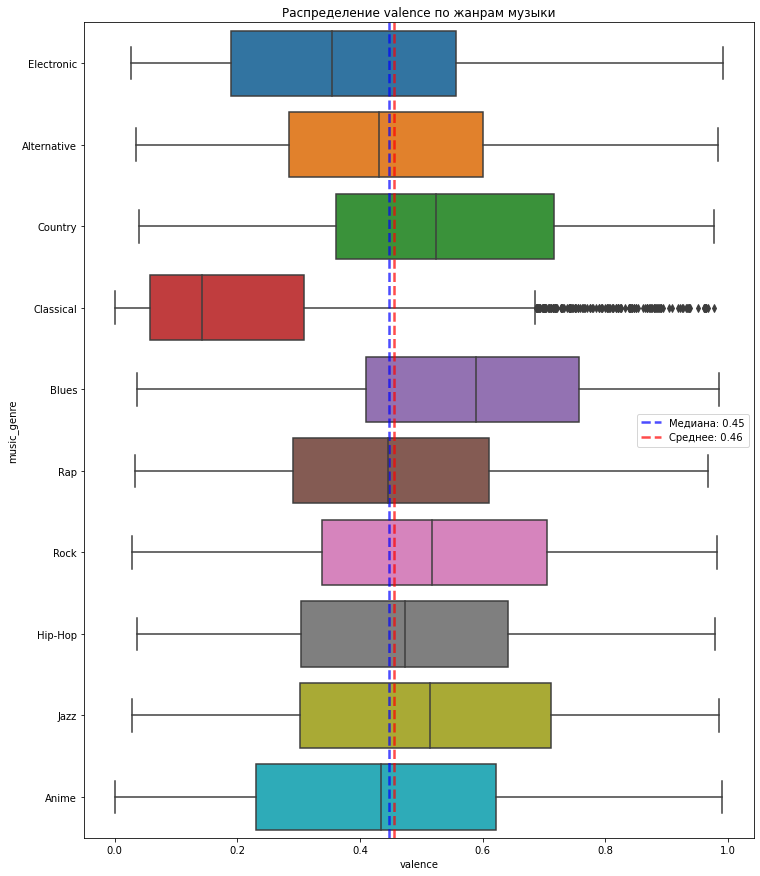

In [364]:
descriptive_stats_and_plot(train, 'valence')

### Столбец popularity](#section3_10)

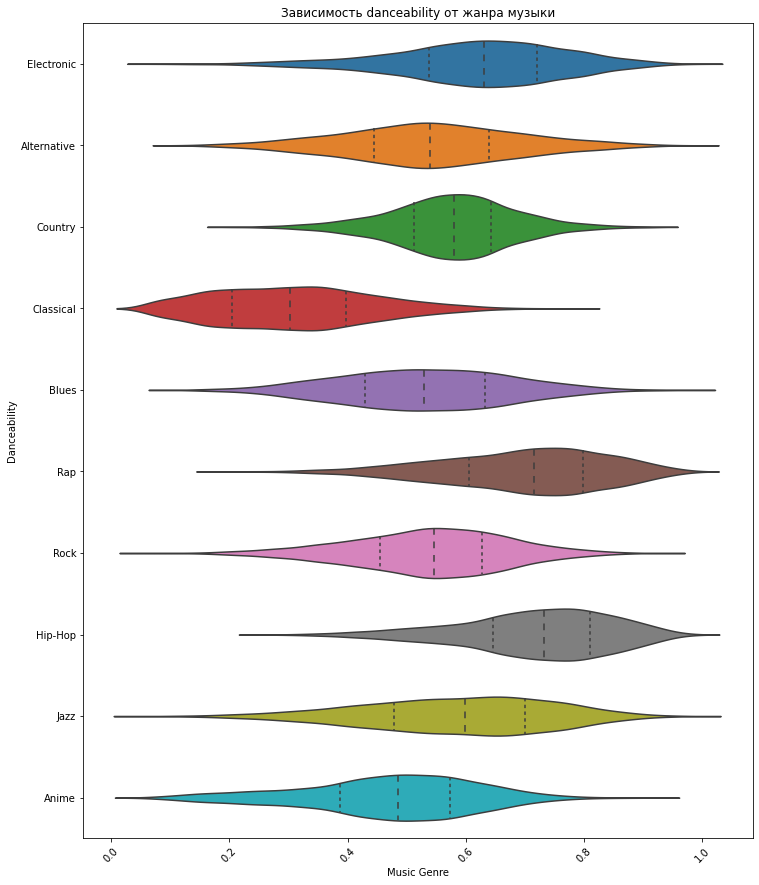

In [ ]:
plt.figure(figsize=(12, 15))
sns.violinplot(x='danceability', y='music_genre', data=train,split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Зависимость danceability от жанра музыки')
plt.xlabel('Music Genre')
plt.ylabel('Danceability')
plt.show()

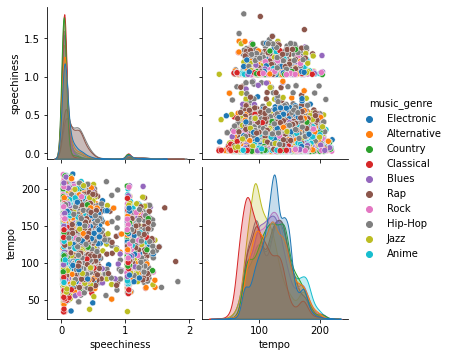

In [55]:
sns.pairplot(train, vars=['speechiness', 'tempo'], hue='music_genre')
plt.show()

In [ ]:
train.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date',
       'valence', 'music_genre'],
      dtype='object')

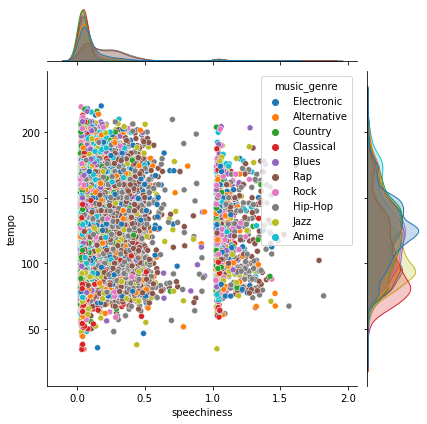

In [56]:
sns.jointplot(data=train, x='speechiness', y='tempo', kind='scatter', hue='music_genre');

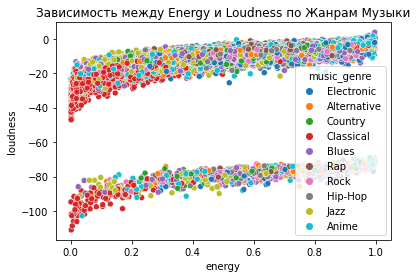

In [ ]:
sns.scatterplot(data=train, x='energy', y='loudness', hue='music_genre')
plt.title("Зависимость между Energy и Loudness по Жанрам Музыки")
plt.show()

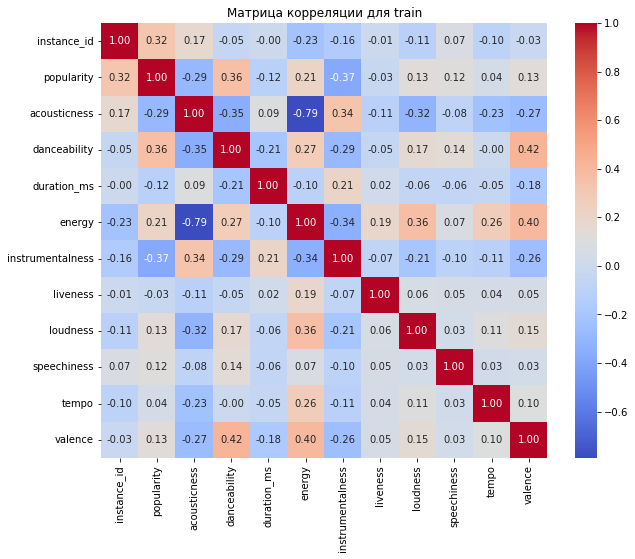

In [59]:
corr_matrix_train = train.corr()

# Визуализация матрицы корреляции для hotel_train
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции для train")
plt.show()


In [ ]:
# Удаление строк с пропусками в столбце 'popularity'
train_clean = train.dropna(subset=['popularity'])

# Создание boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='music_genre', y='popularity', data=train_clean)
plt.xticks(rotation=45)
plt.title('Распределение популярности треков по музыкальным жанрам')
plt.show()

# Или создание violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='music_genre', y='popularity', data=train_clean)
plt.xticks(rotation=45)
plt.title('Распределение популярности треков по жанрам')
plt.show()